In [10]:
import dmrghandler.energy_extrapolation as ee
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp_stats

In [11]:
# fcidump.21_rc_{'Mo': 'def2-SVP', 'I': 'def2-SVP', 'Cl': 'def2-SVP', 'default': '6-311+G(d,p)'}
# Read CSV file
# datafile = 'hami_9_data.csv'
# datafile = 'hami_21_data.csv'
datafile = 'hami_29_data.csv'
# datafile = 'hami_31_data.csv'
data = np.genfromtxt(datafile, delimiter=',', skip_header=1)
loop_indices = data[:, 0]
dmrg_energies = data[:, 1]
bond_dimensions = data[:, 2]
discarded_weights = data[:, 3]

In [12]:
print('Loop indices:', loop_indices)
print('DMRG energies:', dmrg_energies)
print('Bond dimensions:', bond_dimensions)
print('Discarded weights:', discarded_weights)

Loop indices: [-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43.]
DMRG energies: [-5411.55568137 -5411.86633314 -5411.87227278 -5411.88116618
 -5411.88400463 -5411.89405089 -5411.89646532 -5411.91121369
 -5411.92208441 -5411.92800415 -5411.94081172 -5411.945752
 -5411.95941128 -5411.96843709 -5411.97236977 -5411.9802403
 -5411.9894499  -5411.99543953 -5411.99840329 -5412.0045146
 -5412.00734396 -5412.01112322 -5412.0134191  -5412.01705047
 -5412.01866487 -5412.02095336 -5412.0224683  -5412.02379711
 -5412.02473632 -5412.02571902 -5412.02668324 -5412.02638112
 -5412.02724808 -5412.02805867 -5412.02911577 -5412.03010727
 -5412.0309986  -5412.03179281 -5412.03254704 -5412.03329851
 -5412.03403359 -5412.03465313 -5412.03522565 -5412.03579229
 -5412.03642457]
Bond dimensions: [  5.   6.   7.   8.   9.  10.  11.  13.  15.  17.  19.  21.  24.  27.
  30.  33.  37.

In [13]:
# Sort data based on bond dimension
sorted_indices = np.argsort(bond_dimensions)
# sorted_indices = np.argsort(discarded_weights)[::-1]
sorted_bond_dimensions = bond_dimensions[sorted_indices]
sorted_dmrg_energies = dmrg_energies[sorted_indices]
sorted_discarded_weights = discarded_weights[sorted_indices]


In [14]:
sorted_bond_dimensions

array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  13.,  15.,  17.,  19.,
        21.,  24.,  27.,  30.,  33.,  37.,  41.,  46.,  51.,  57.,  63.,
        70.,  77.,  85.,  94., 104., 115., 127., 140., 150., 154., 165.,
       182., 201., 222., 245., 270., 297., 327., 360., 397., 437., 481.,
       530.])

Number of kept bond dimensions: 3
Kept bond dimensions: [437. 481. 530.]
Kept DMRG energies: [-5412.03522565 -5412.03579229 -5412.03642457]
Kept discarded weights: [5.94212051e-05 5.61612261e-05 5.19117322e-05]
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.5998e+00                                    1.61e+02    
       1              5         8.9512e-01      4.70e+00       1.81e-02       2.00e+02    
       2              6         1.7345e-01      7.22e-01       2.15e-01       9.83e+01    
       3              7         8.0665e-03      1.65e-01       4.50e-01       1.89e+01    
       4              8         3.4624e-05      8.03e-03       8.46e-01       6.76e-01    
       5              9         6.0167e-06      2.86e-05       2.27e+00       2.90e-01    
       6             12         5.5777e-06      4.39e-07       2.85e-01       2.88e-01    
       7             13         3.8467e-06      1.73e-06     

/tmp/ipykernel_22420/2254065599.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


a: -3.686402395752655
b: 1.0011806363836644
Predicted relative energy: [-11.19534641 -11.34864743 -11.48844114 -11.39254629 -11.51593085
 -11.69266982 -12.05570504 -12.05366441 -12.2014366  -12.36610575
 -12.57017343 -12.69420719 -12.73446884 -12.80811336 -12.90036008
 -12.9570047  -12.99978877 -12.98603763 -13.04876979 -13.0872199
 -13.04399737 -13.05526975 -13.10606655 -13.15181916 -13.17506008
 -13.23954407 -13.30652588 -13.35694348 -13.42875041 -13.48524159
 -13.56401625]
Number of kept bond dimensions: 32
Kept bond dimensions: [ 27.  30.  33.  37.  41.  46.  51.  57.  63.  70.  77.  85.  94. 104.
 115. 127. 140. 150. 154. 165. 182. 201. 222. 245. 270. 297. 327. 360.
 397. 437. 481. 530.]
Kept DMRG energies: [-5411.96843709 -5411.97236977 -5411.9802403  -5411.9894499
 -5411.99543953 -5411.99840329 -5412.0045146  -5412.00734396
 -5412.01112322 -5412.0134191  -5412.01705047 -5412.01866487
 -5412.02095336 -5412.0224683  -5412.02379711 -5412.02473632
 -5412.02571902 -5412.02638112 -541

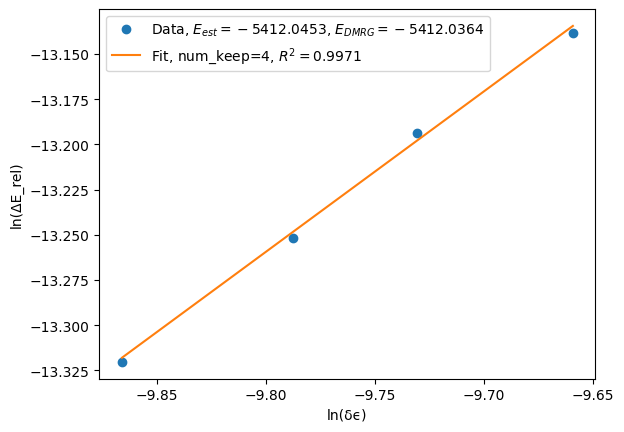

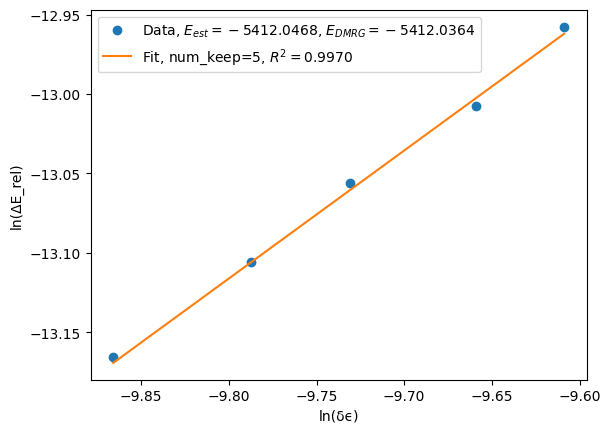

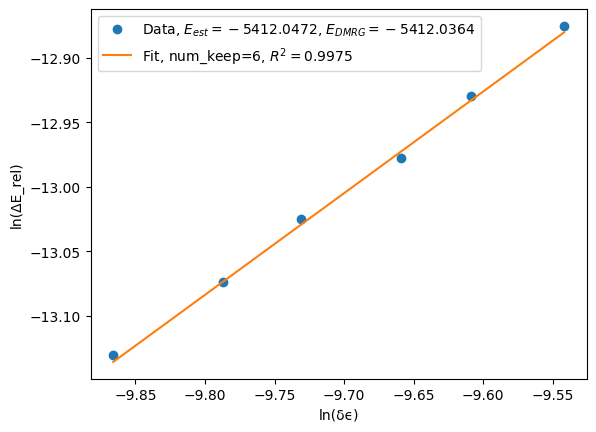

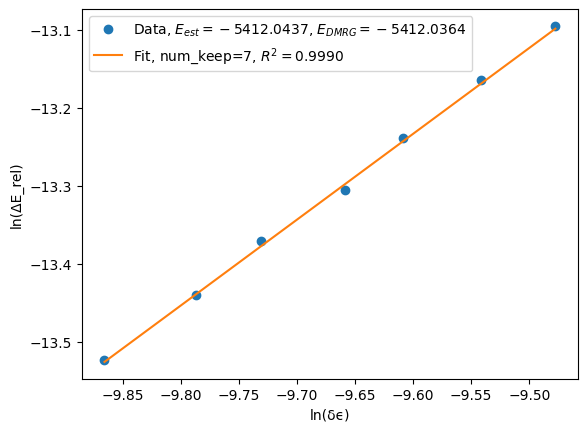

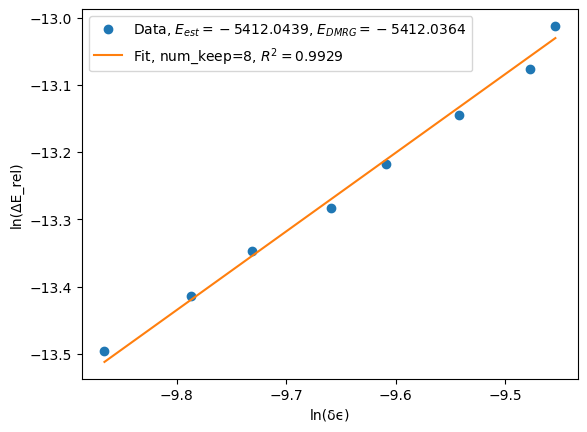

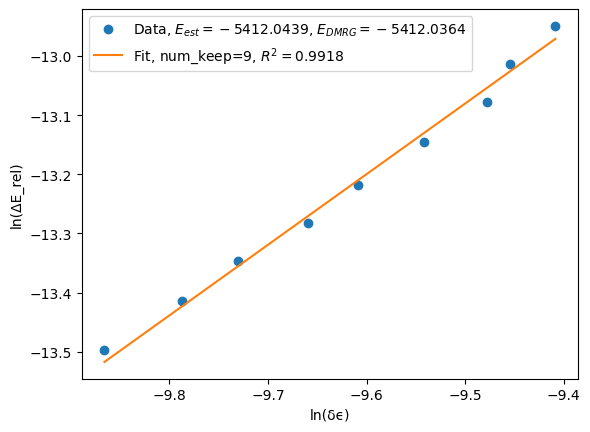

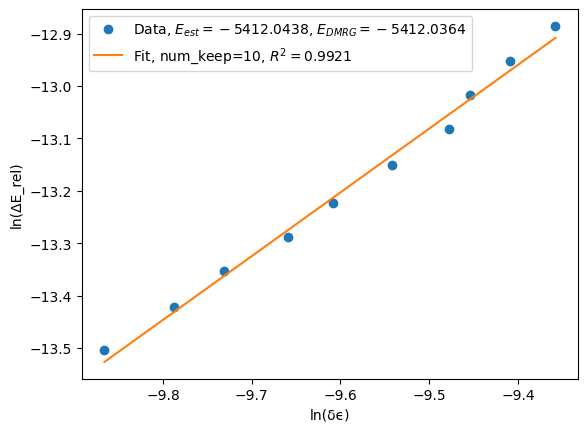

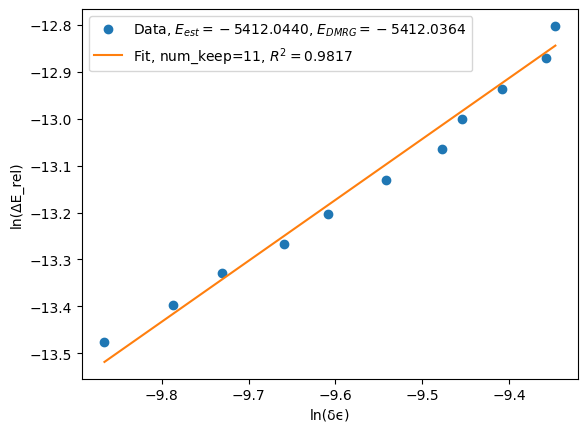

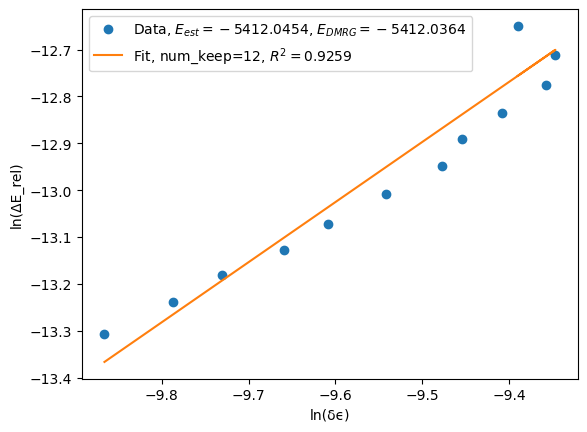

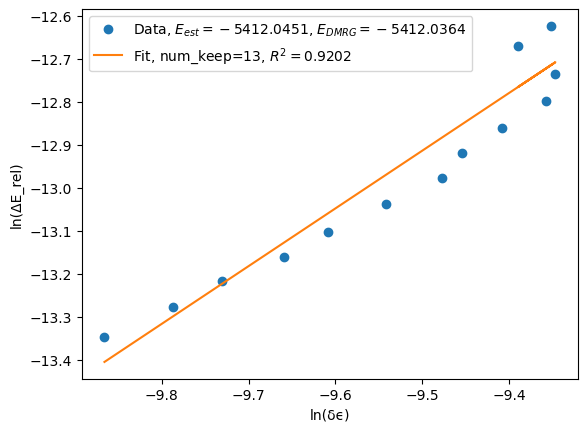

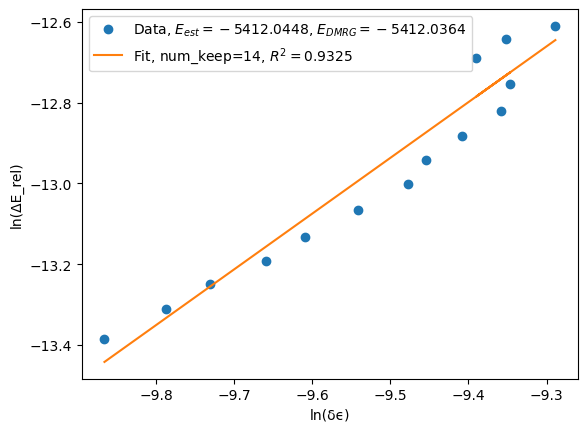

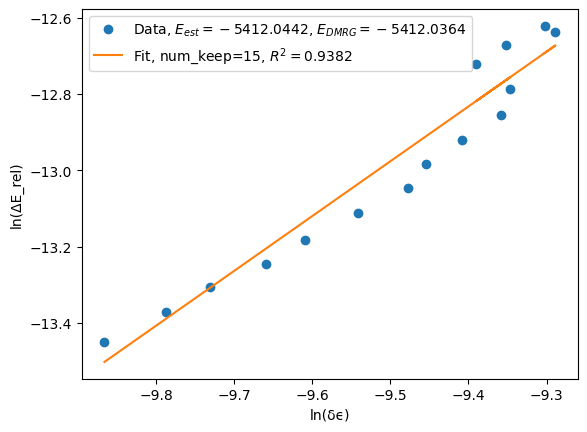

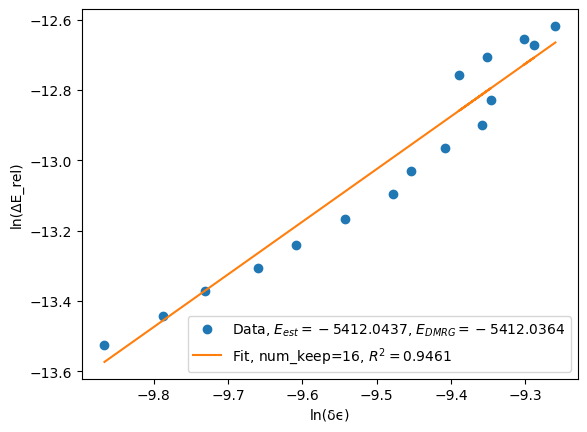

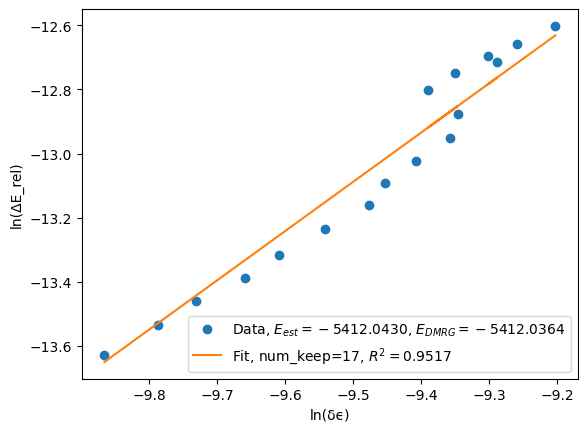

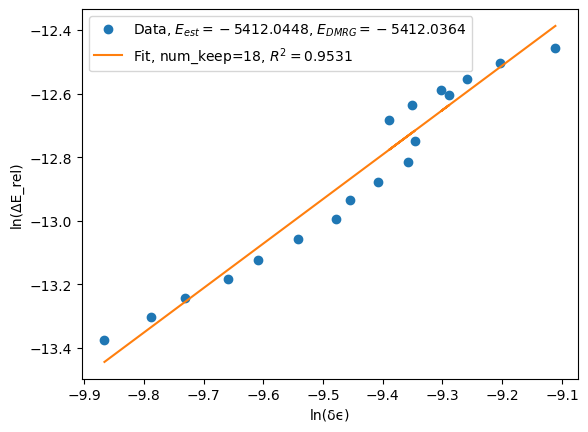

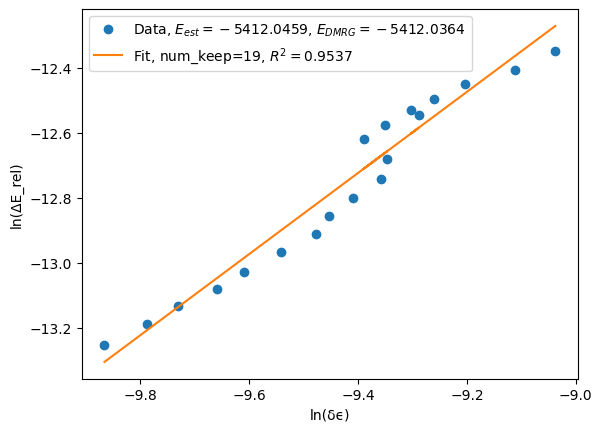

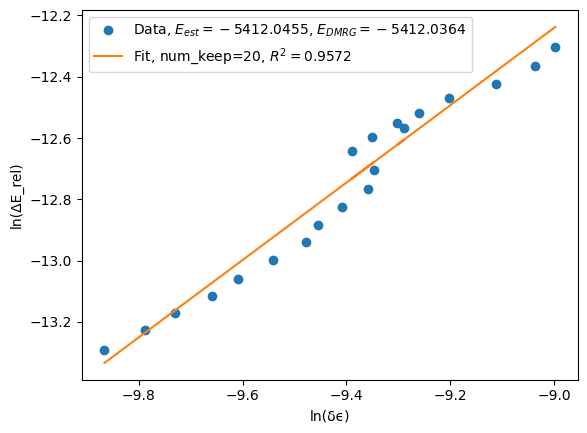

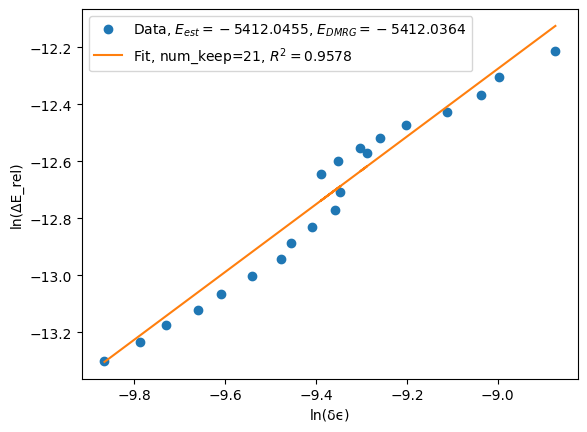

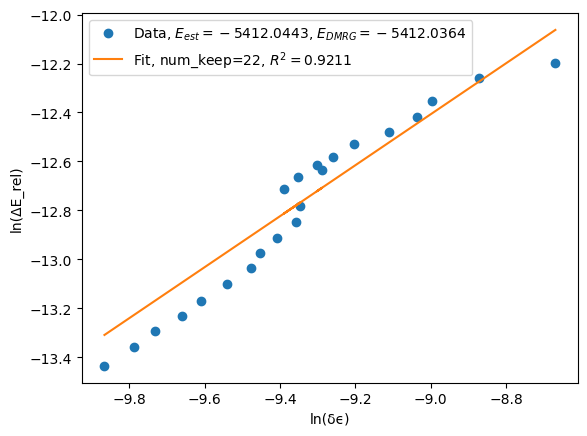

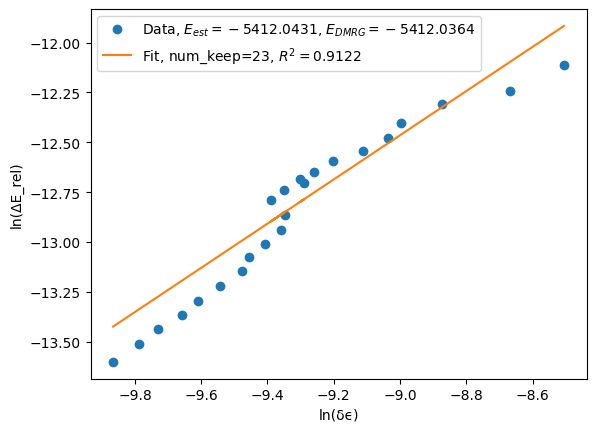

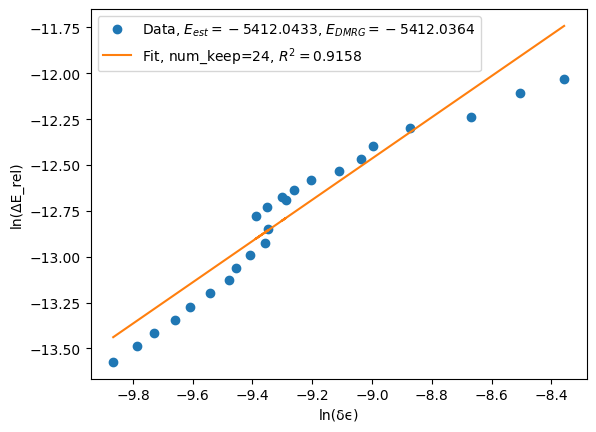

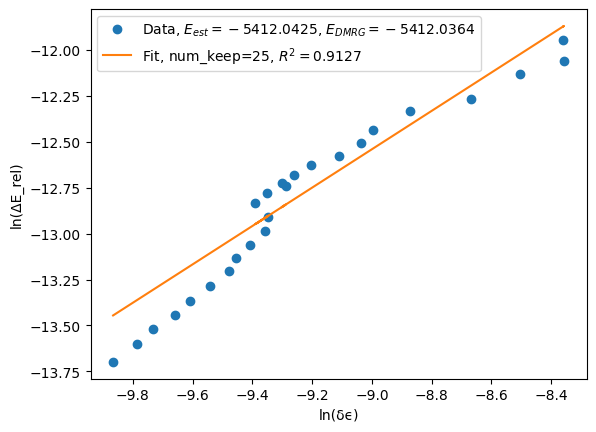

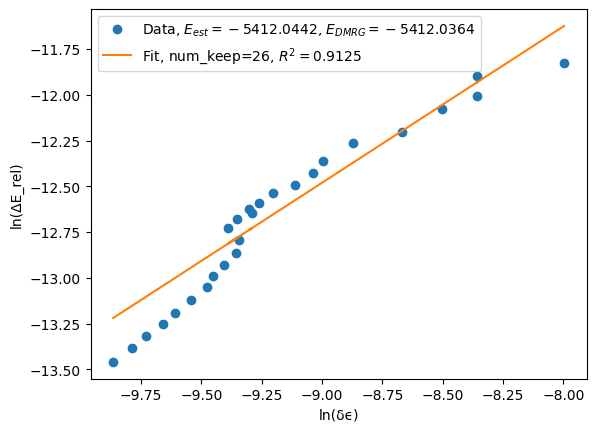

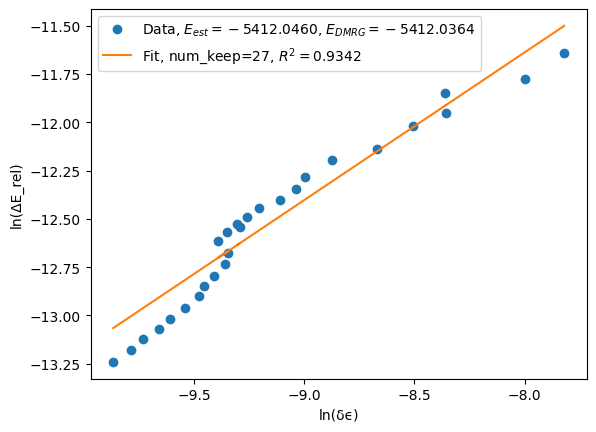

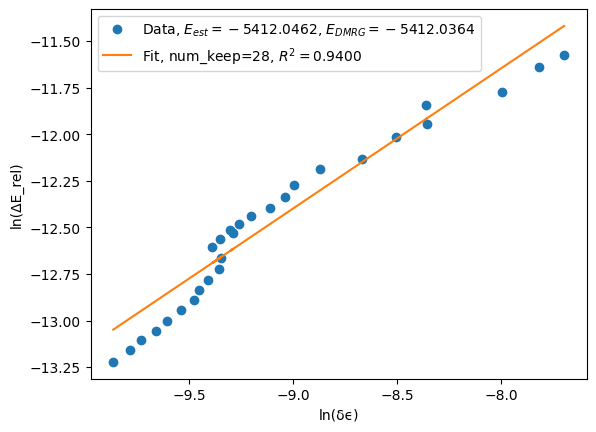

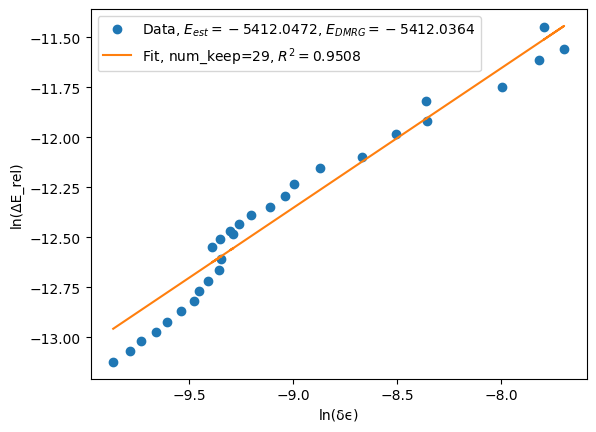

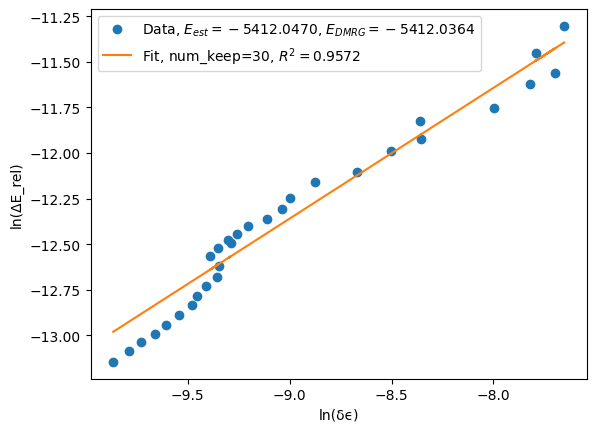

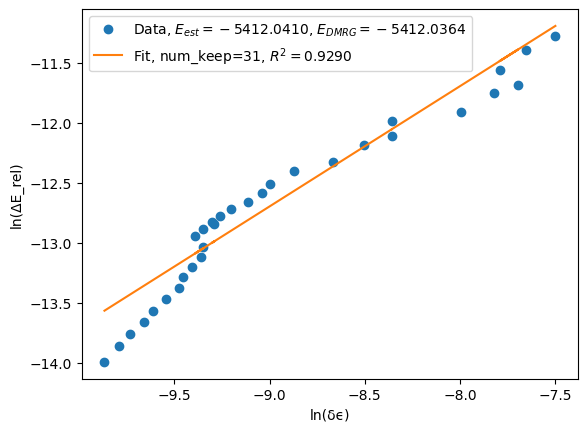

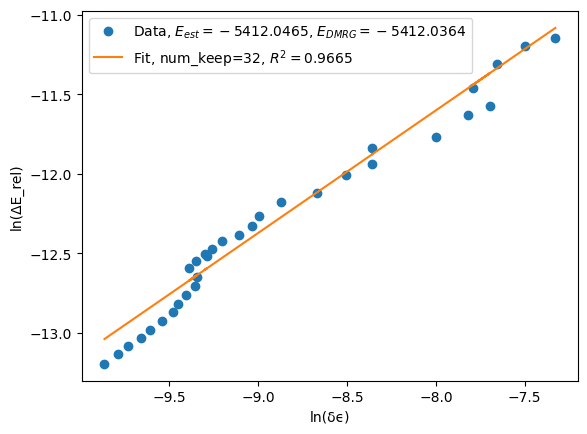

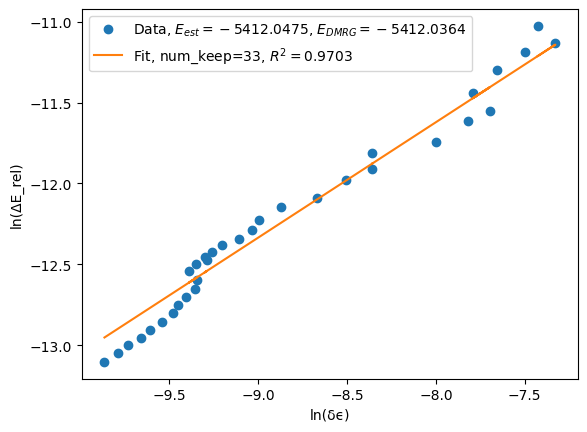

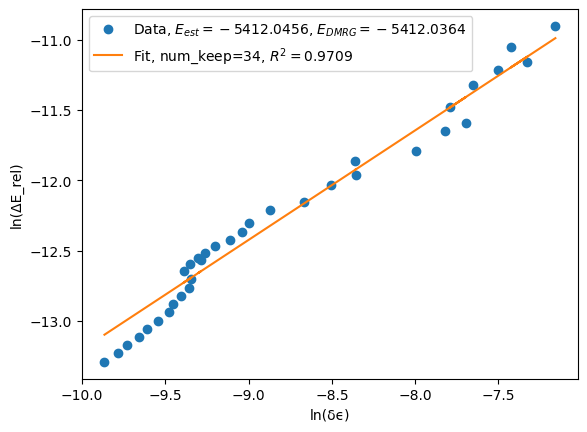

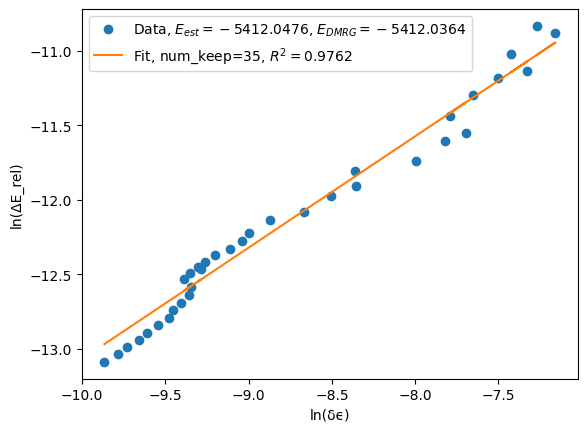

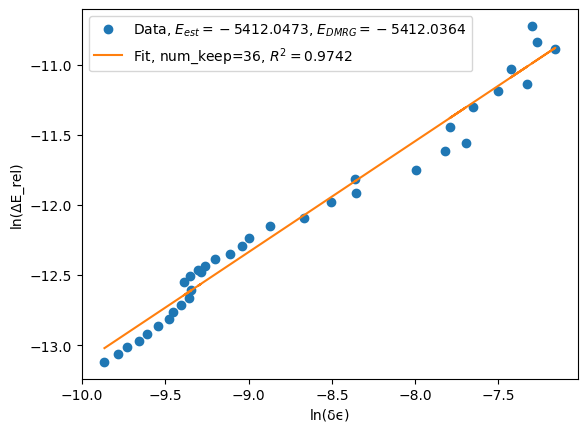

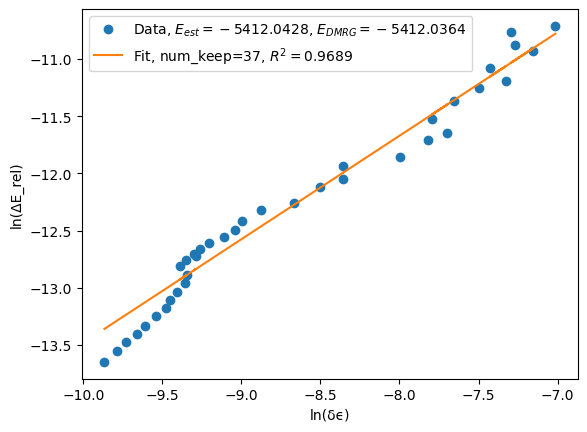

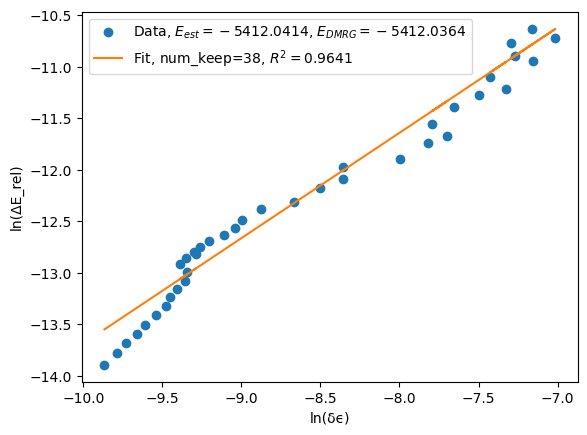

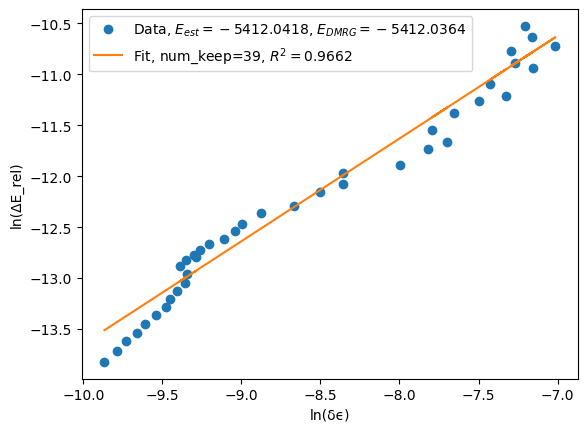

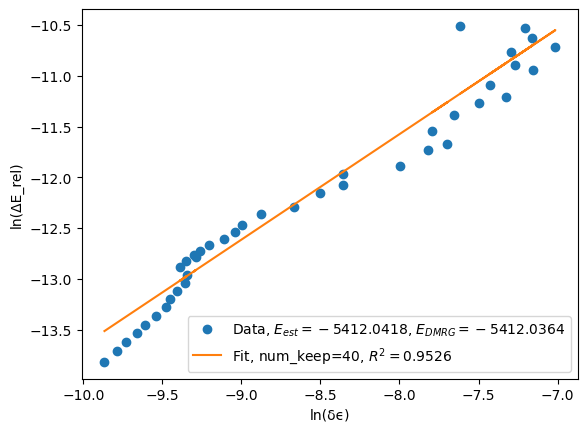

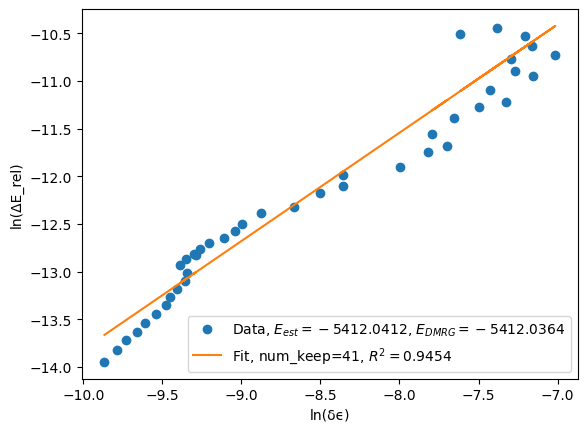

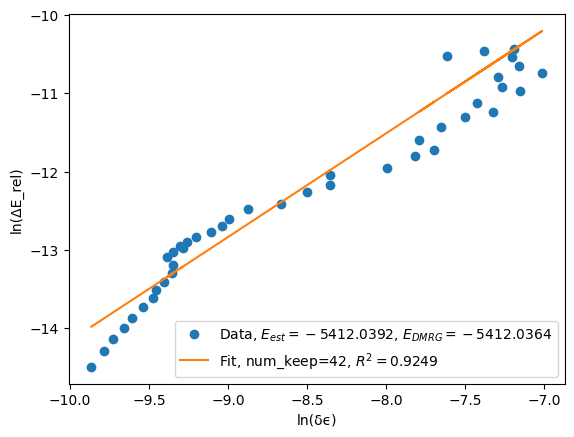

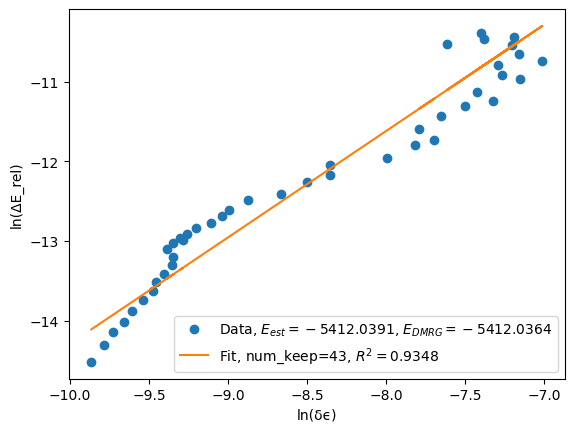

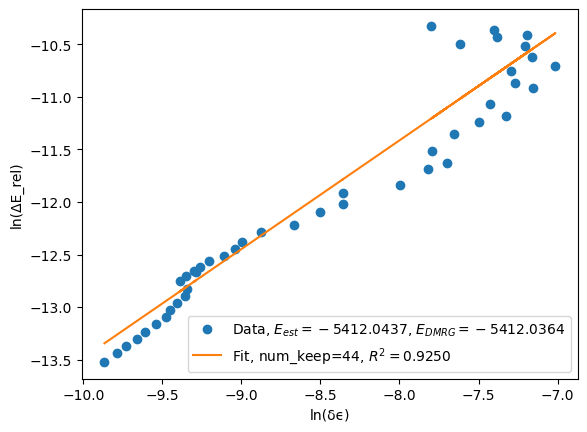

In [15]:
# num_keep = len(sorted_bond_dimensions)
# num_keep = 10


# num_keep_list = [3,4,5,6,7,8,9,10]
num_keep_list = np.arange(3, len(sorted_bond_dimensions))
est_energies_list = []
r_squared_list = []
num_keep_list_final = []
for num_keep in num_keep_list:
    kept_bond_dimensions = sorted_bond_dimensions[-num_keep:]
    kept_dmrg_energies = sorted_dmrg_energies[-num_keep:]
    kept_discarded_weights = sorted_discarded_weights[-num_keep:]

    print('Number of kept bond dimensions:', num_keep)
    print('Kept bond dimensions:', kept_bond_dimensions)
    print('Kept DMRG energies:', kept_dmrg_energies)
    print('Kept discarded weights:', kept_discarded_weights)

    (result_obj, energy_estimated, fit_parameters, R_squared) = ee.dmrg_energy_extrapolation(
        energies_dmrg=kept_dmrg_energies,
        independent_vars=kept_discarded_weights,
        extrapolation_type= "discarded_weight",
        past_parameters = None,
        verbosity=2,
    )
    if R_squared < 0.9:
        print('R squared is less than 0.9. Skipping...')
        continue

    print('Energy estimated:', energy_estimated)
    print('DMRG Energy:', np.min(kept_dmrg_energies))
    print('Fit parameters:', fit_parameters)
    print('R squared:', R_squared)

    est_energies_list.append(energy_estimated)
    r_squared_list.append(R_squared)
    num_keep_list_final.append(num_keep)

    # Plot
    plt.figure()
    ln_weights = np.log(kept_discarded_weights)
    rel_energy = (kept_dmrg_energies - energy_estimated)/energy_estimated
    ln_abs_rel_energy = np.log(np.abs(rel_energy))
    plt.plot(ln_weights, ln_abs_rel_energy, 'o', label=rf'Data, $E_{{est}}={energy_estimated:.4f}$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$')
    # ln ΔE_rel =a+b ln(δϵ)
    # alpha = fit_parameters[0]
    # a =np.log(alpha)
    a = fit_parameters[0]
    b = fit_parameters[1]

    predicted_rel_energy = a + b * ln_weights
    # print('alpha:', alpha)
    print('a:', a)
    print('b:', b)
    print('Predicted relative energy:', predicted_rel_energy)
    plt.plot(ln_weights, predicted_rel_energy, label=f'Fit, num_keep={num_keep}, $R^2={R_squared:.4f}$')

    # ee.plot_extrapolation(discarded_weights=kept_discarded_weights,
    #     energies_dmrg=kept_dmrg_energies,
    #     fit_parameters=fit_parameters,
    #     bond_dims=kept_bond_dimensions,
    #     plot_filename = None,
    #     figNum = 0,
    # )
    plt.xlabel('ln(δϵ)')
    plt.ylabel('ln(ΔE_rel)')
    plt.legend()
plt.show()



<Figure size 640x480 with 0 Axes>

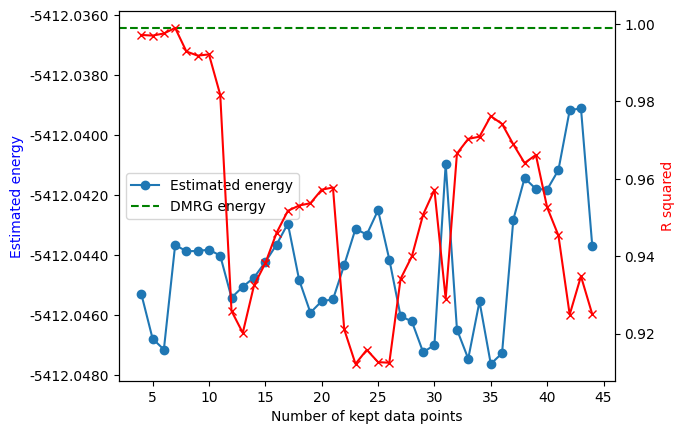

In [16]:
# Plot est energies and r squared on same plot with num keep as x axis and two different y axes
plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(num_keep_list_final, est_energies_list, 'o-', label='Estimated energy')
ax2.plot(num_keep_list_final, r_squared_list, 'x-', label='R squared', color='r')
ax1.set_xlabel('Number of kept data points')
ax1.set_ylabel('Estimated energy', color='b')
ax2.set_ylabel('R squared', color='r')
# Format ax1 to have four decimal places in labels with no shift value
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))
# Add DMRG energy
ax1.axhline(y=np.min(dmrg_energies), color='g', linestyle='--', label='DMRG energy')
# Add legend
ax1.legend()
plt.show()



Number of kept bond dimensions: 3
Kept bond dimensions: [437. 481. 530.]
Kept DMRG energies: [-5412.03522565 -5412.03579229 -5412.03642457]
Kept discarded weights: [5.94212051e-05 5.61612261e-05 5.19117322e-05]
Energy estimated: -5412.044697916357
DMRG Energy: -5412.03642456658
slope: 159.1174406700275
intercept: -5412.044697916357
R squared: 0.9980352450836554
Number of kept bond dimensions: 4
Kept bond dimensions: [397. 437. 481. 530.]
Kept DMRG energies: [-5412.03465313 -5412.03522565 -5412.03579229 -5412.03642457]
Kept discarded weights: [6.38395821e-05 5.94212051e-05 5.61612261e-05 5.19117322e-05]
Energy estimated: -5412.044211906488
DMRG Energy: -5412.03642456658
slope: 150.2244611583372
intercept: -5412.044211906488
R squared: 0.9971228728262989
Number of kept bond dimensions: 5
Kept bond dimensions: [360. 397. 437. 481. 530.]
Kept DMRG energies: [-5412.03403359 -5412.03465313 -5412.03522565 -5412.03579229
 -5412.03642457]
Kept discarded weights: [6.71367475e-05 6.38395821e-05 5

/tmp/ipykernel_22420/2920289439.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


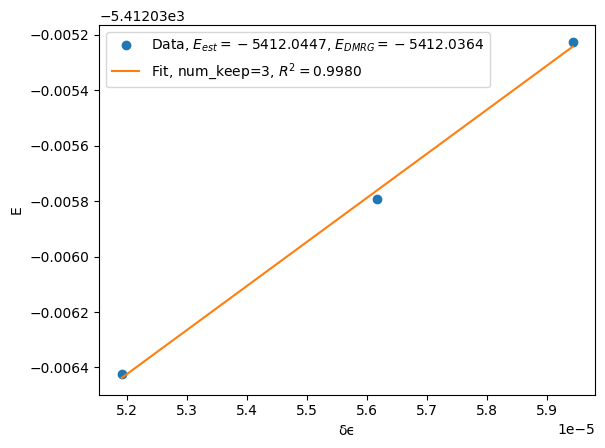

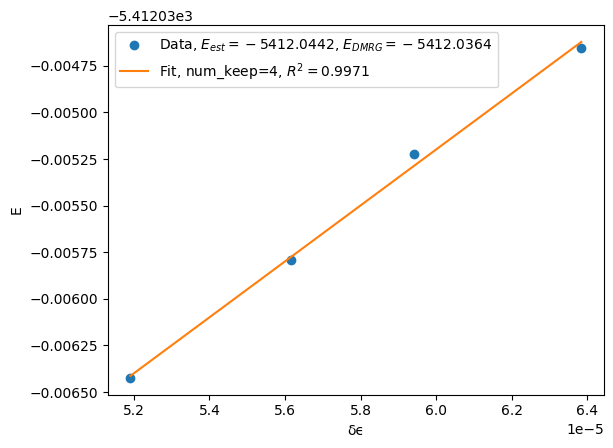

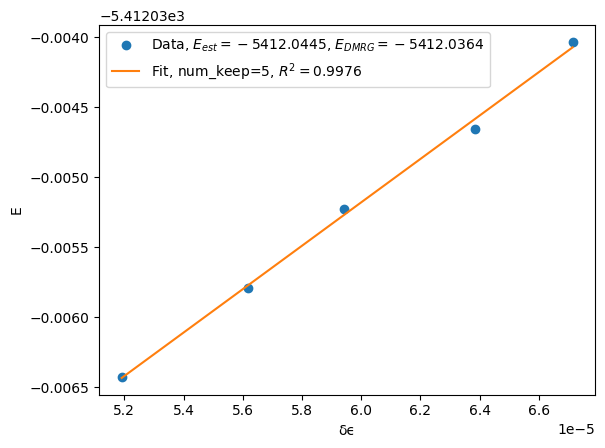

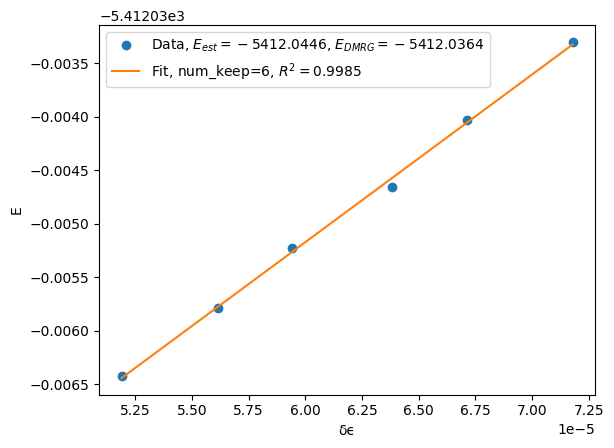

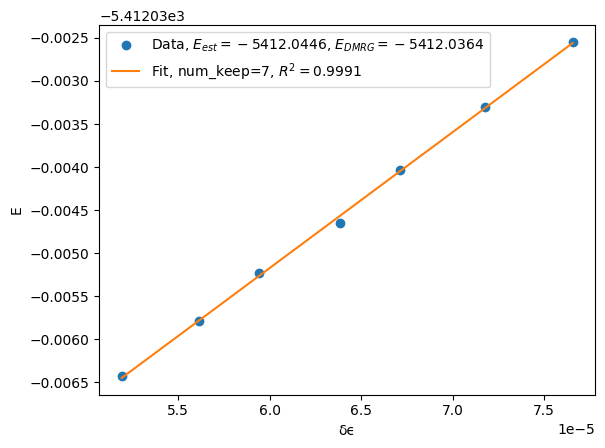

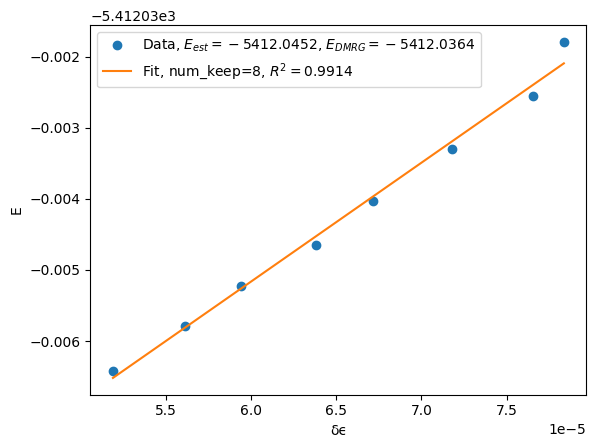

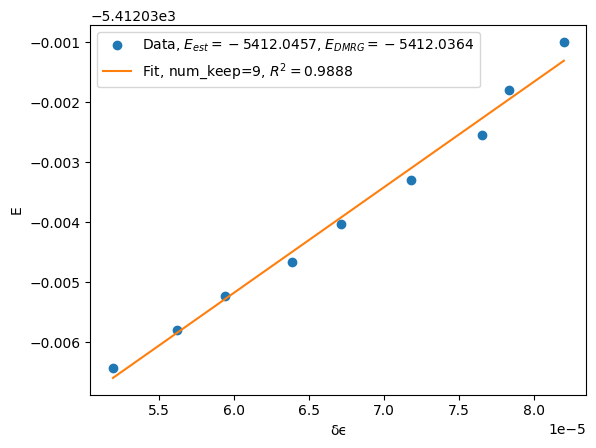

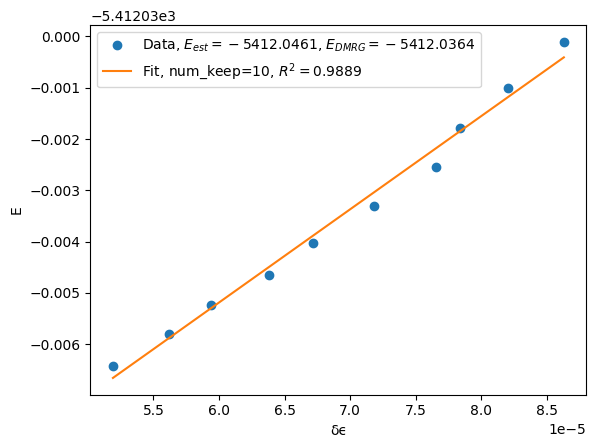

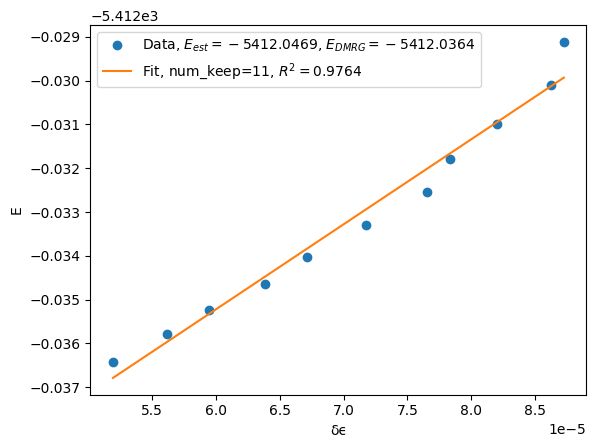

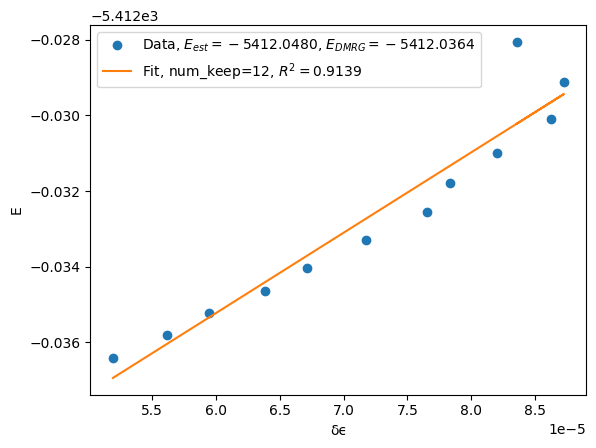

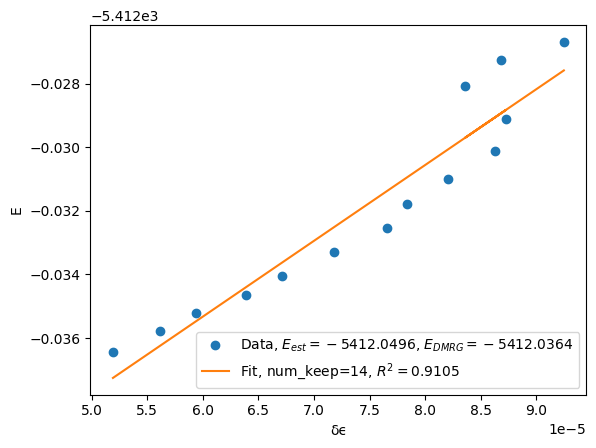

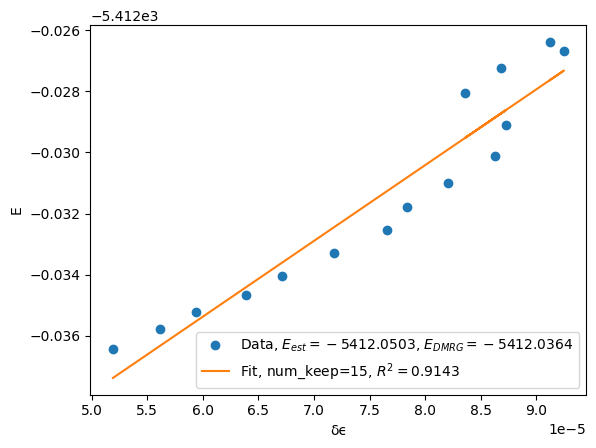

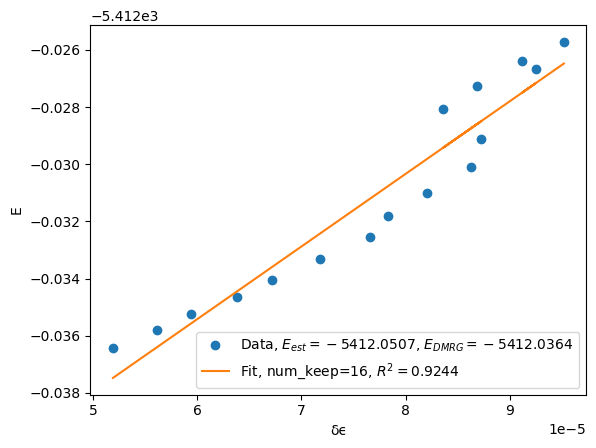

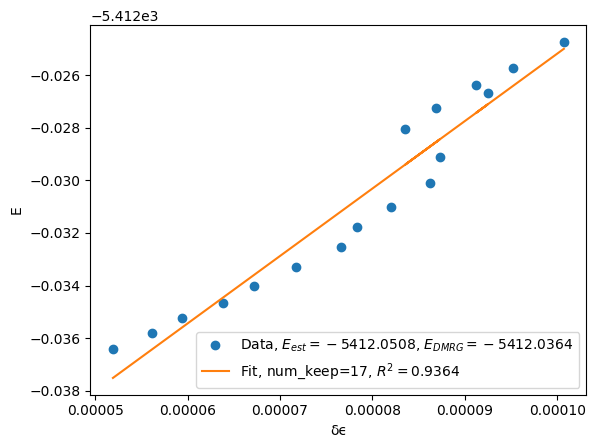

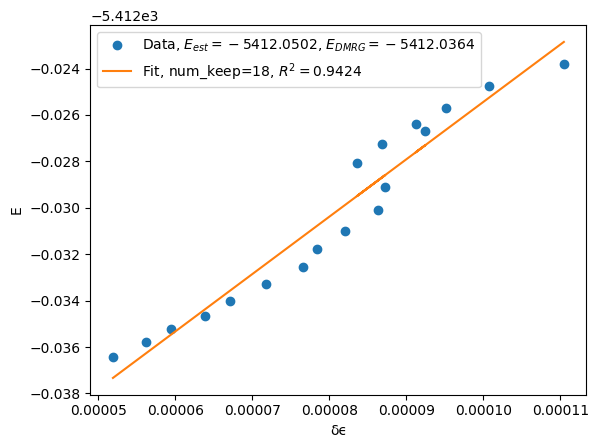

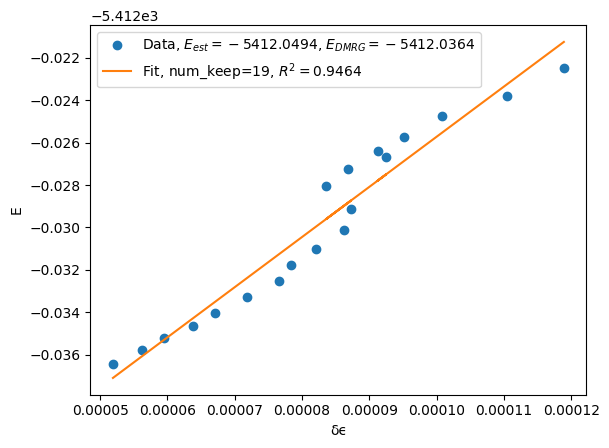

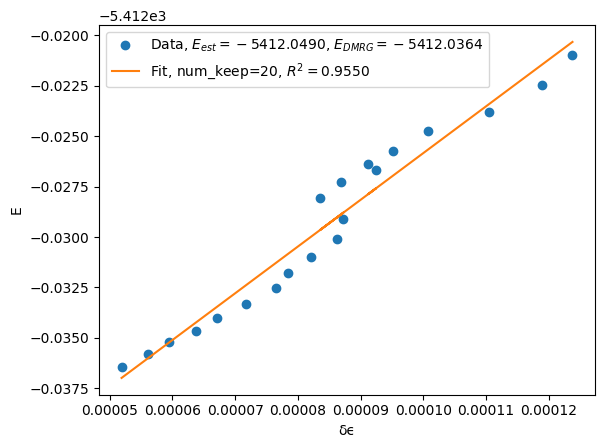

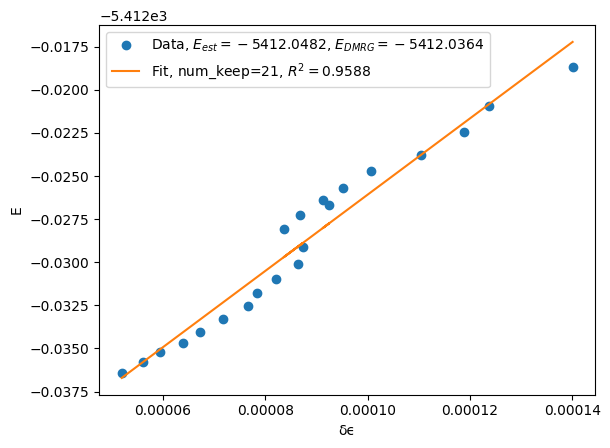

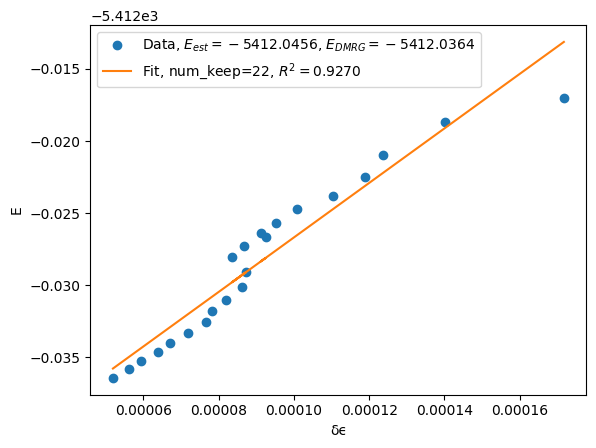

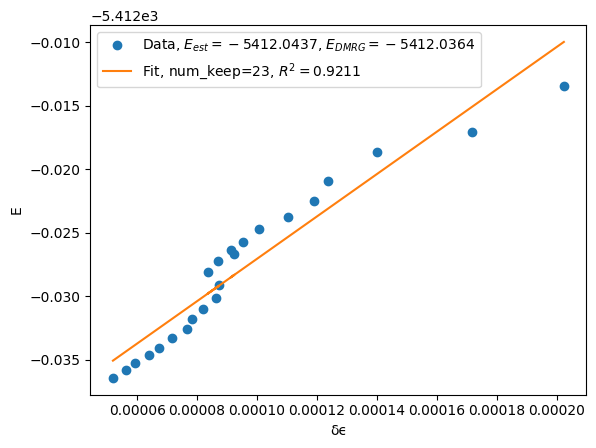

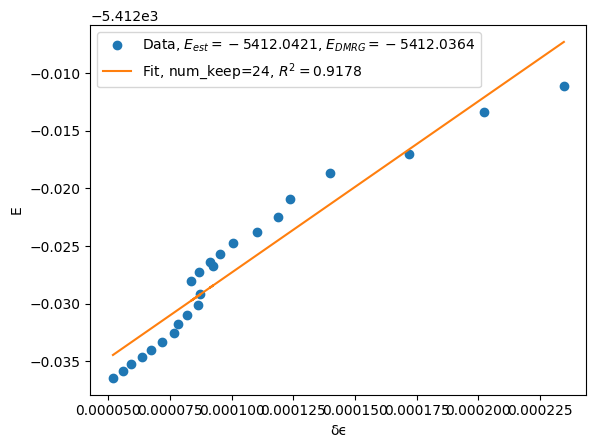

In [17]:
# num_keep = len(sorted_bond_dimensions)
# num_keep = 10


# num_keep_list = [3,4,5,6,7,8,9,10]
# num_keep_list = np.arange(3, len(sorted_bond_dimensions))
num_keep_list = np.arange(3, 25)
est_energies_list = []
r_squared_list = []
num_keep_list_final = []
intercept_stderr_list=[]
for num_keep in num_keep_list:
    kept_bond_dimensions = sorted_bond_dimensions[-num_keep:]
    kept_dmrg_energies = sorted_dmrg_energies[-num_keep:]
    kept_discarded_weights = sorted_discarded_weights[-num_keep:]

    print("Number of kept bond dimensions:", num_keep)
    print("Kept bond dimensions:", kept_bond_dimensions)
    print("Kept DMRG energies:", kept_dmrg_energies)
    print("Kept discarded weights:", kept_discarded_weights)

    # (result_obj, energy_estimated, fit_parameters, R_squared) = ee.dmrg_energy_extrapolation(
    #     energies_dmrg=kept_dmrg_energies,
    #     independent_vars=kept_discarded_weights,
    #     extrapolation_type= "discarded_weight",
    #     past_parameters = None,
    #     verbosity=2,
    # )
    slope, intercept, R_squared, slope_stderr, intercept_stderr = (
        ee.discarded_weight_linear_fitting(
            discarded_weights=kept_discarded_weights, dmrg_energies=kept_dmrg_energies
        )
    )

    energy_estimated = intercept

    if R_squared < 0.9:
        print("R squared is less than 0.9. Skipping...")
        continue
    print("Energy estimated:", energy_estimated)
    print("DMRG Energy:", np.min(kept_dmrg_energies))
    print("slope:", slope)
    print("intercept:", intercept)
    print("R squared:", R_squared)

    est_energies_list.append(energy_estimated)
    r_squared_list.append(R_squared)
    num_keep_list_final.append(num_keep)
    intercept_stderr_list.append(intercept_stderr)
    # Plot
    plt.figure()
    # ln_weights = np.log(kept_discarded_weights)
    # rel_energy = (kept_dmrg_energies - energy_estimated)/energy_estimated
    # ln_abs_rel_energy = np.log(np.abs(rel_energy))
    # plt.plot(ln_weights, ln_abs_rel_energy, 'o', label=rf'Data, $E_{{est}}={energy_estimated:.4f}$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$')
    plt.plot(
        kept_discarded_weights,
        kept_dmrg_energies,
        "o",
        label=rf"Data, $E_{{est}}={energy_estimated:.4f}$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$",
    )
    # ln ΔE_rel =a+b ln(δϵ)
    # alpha = fit_parameters[0]
    # a =np.log(alpha)
    # a = fit_parameters[0]
    # b = fit_parameters[1]

    # predicted_rel_energy = a + b * ln_weights
    # # print('alpha:', alpha)
    # print('a:', a)
    # print('b:', b)
    # print('Predicted relative energy:', predicted_rel_energy)
    # plt.plot(ln_weights, predicted_rel_energy, label=f'Fit, num_keep={num_keep}, $R^2={R_squared:.4f}$')
    plt.plot(
        kept_discarded_weights,
        slope * kept_discarded_weights + intercept,
        label=f"Fit, num_keep={num_keep}, $R^2={R_squared:.4f}$",
    )

    # ee.plot_extrapolation(discarded_weights=kept_discarded_weights,
    #     energies_dmrg=kept_dmrg_energies,
    #     fit_parameters=fit_parameters,
    #     bond_dims=kept_bond_dimensions,
    #     plot_filename = None,
    #     figNum = 0,
    # )
    plt.xlabel("δϵ")
    plt.ylabel("E")
    plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

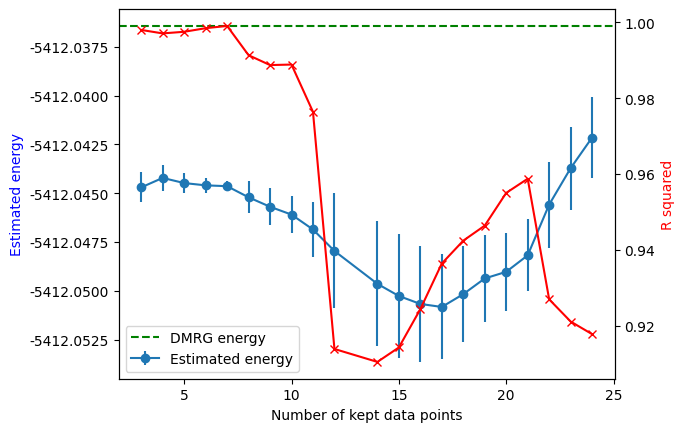

In [18]:
# Plot est energies and r squared on same plot with num keep as x axis and two different y axes
plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.errorbar(num_keep_list_final, est_energies_list, yerr=1.96*np.array(intercept_stderr_list), marker='o', linestyle='-', label='Estimated energy')
ax2.plot(num_keep_list_final, r_squared_list, 'x-', label='R squared', color='r')
ax1.set_xlabel('Number of kept data points')
ax1.set_ylabel('Estimated energy', color='b')
ax2.set_ylabel('R squared', color='r')
# ax1.text(0.9, 0.9, f'95% CI: +/-{1.96*intercept_stderr*1000:.3f} mHa', horizontalalignment='right', verticalalignment='center', transform=ax1.transAxes)
# Format ax1 to have four decimal places in labels with no shift value
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))
# Add DMRG energy
ax1.axhline(y=np.min(dmrg_energies), color='g', linestyle='--', label='DMRG energy')
# Add legend
ax1.legend()
plt.show()

/tmp/ipykernel_22420/3403289227.py:117: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


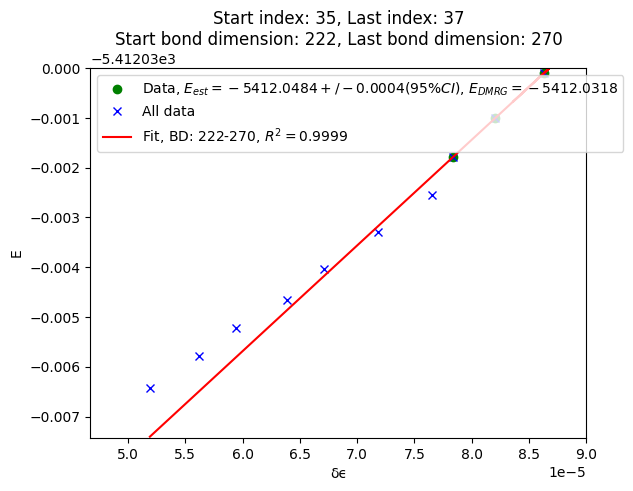

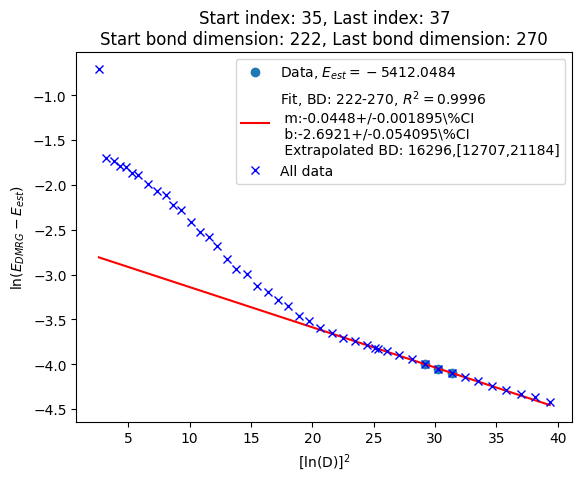

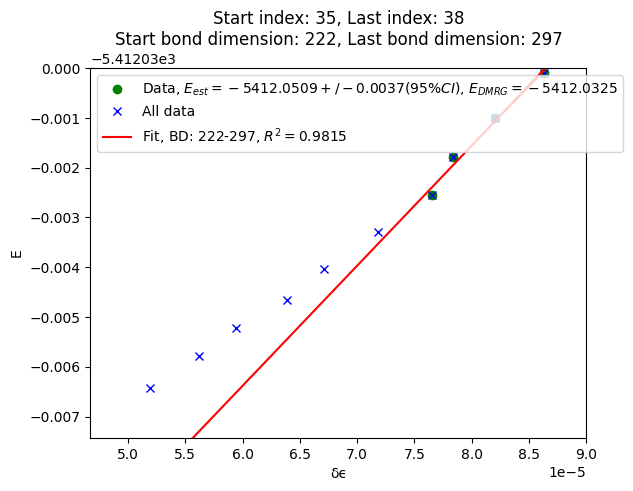

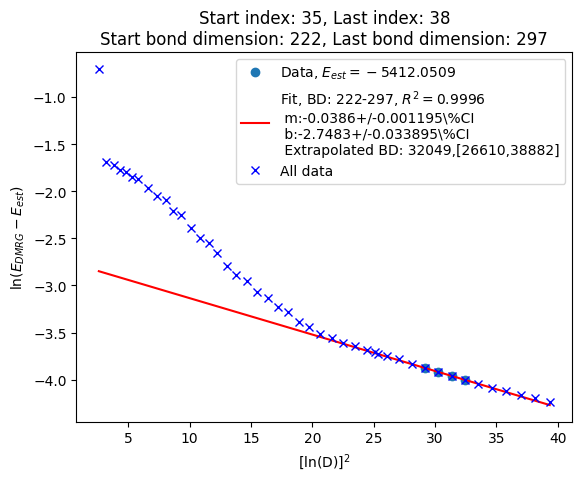

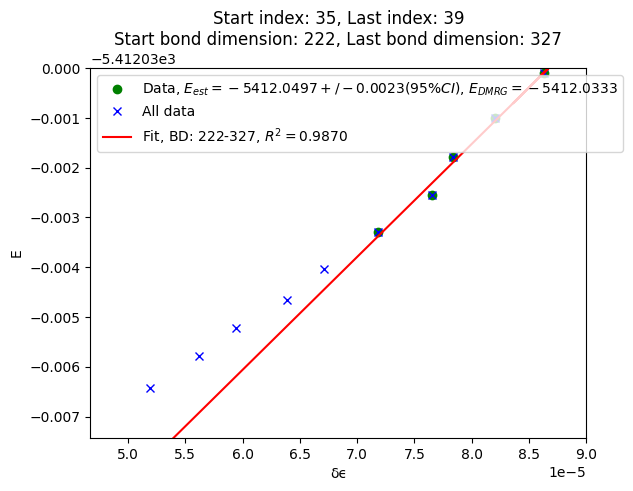

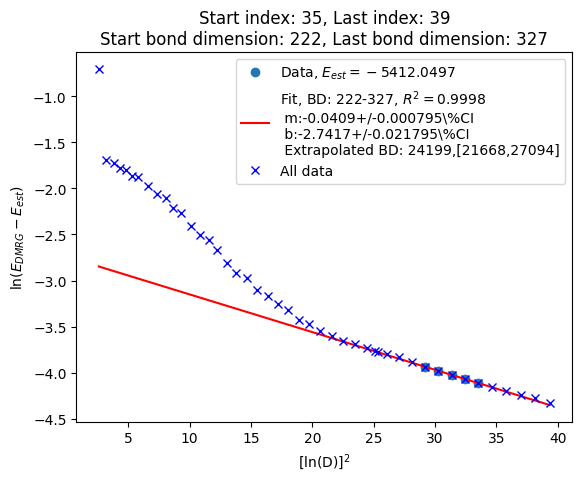

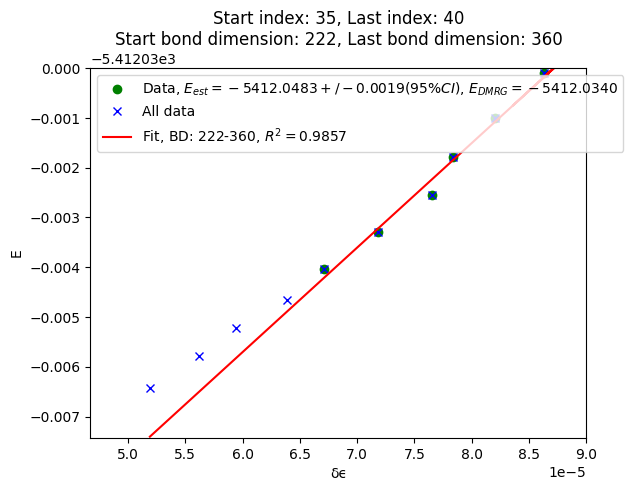

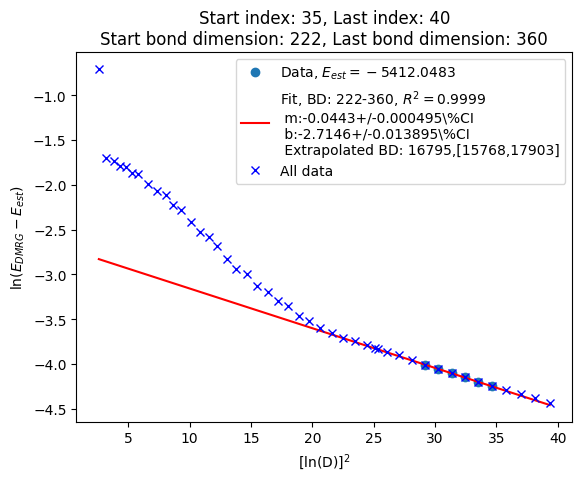

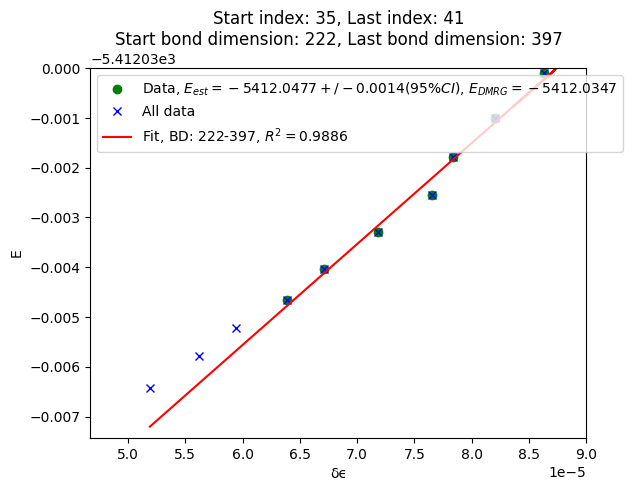

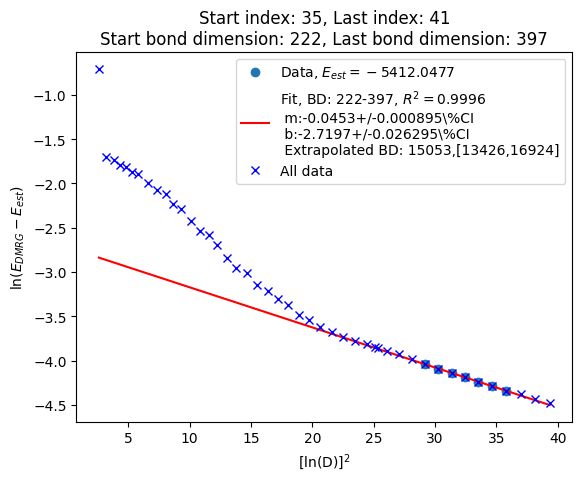

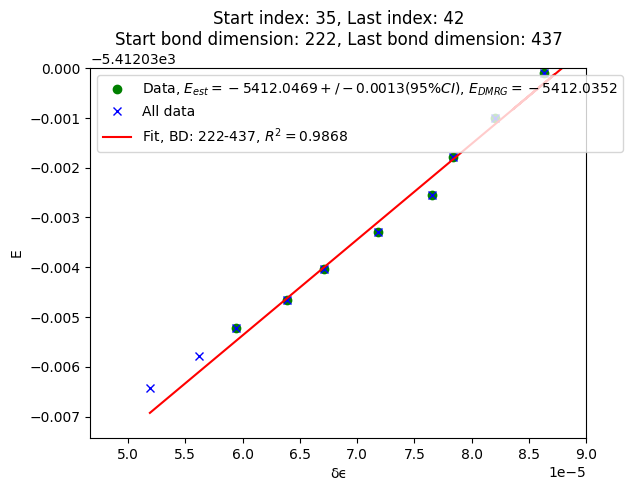

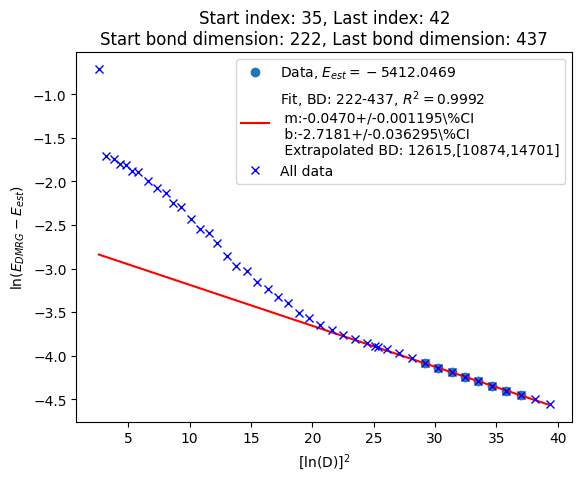

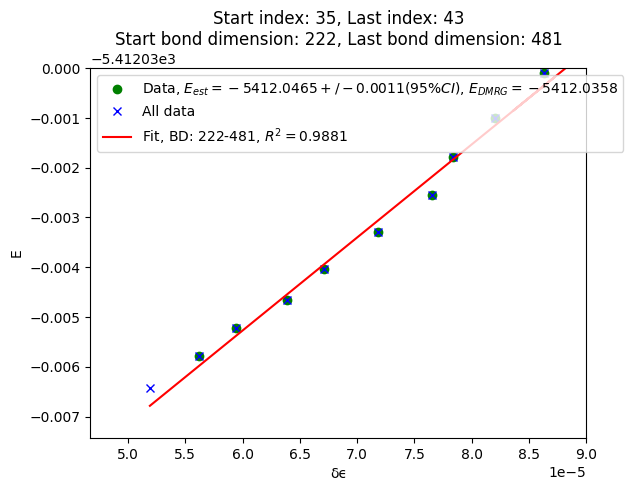

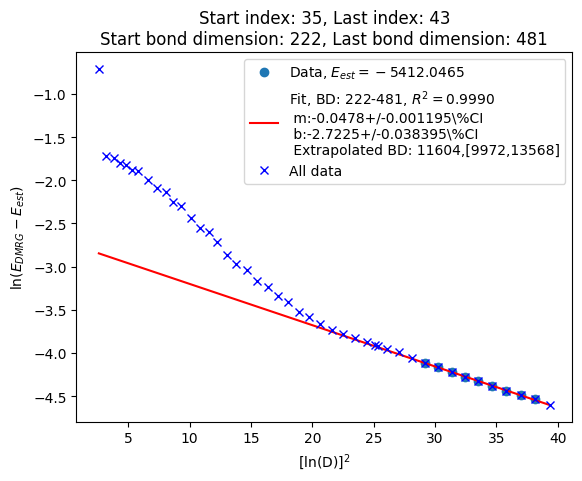

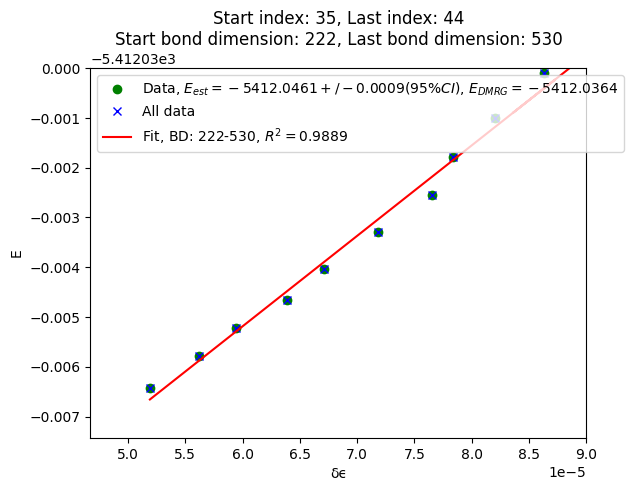

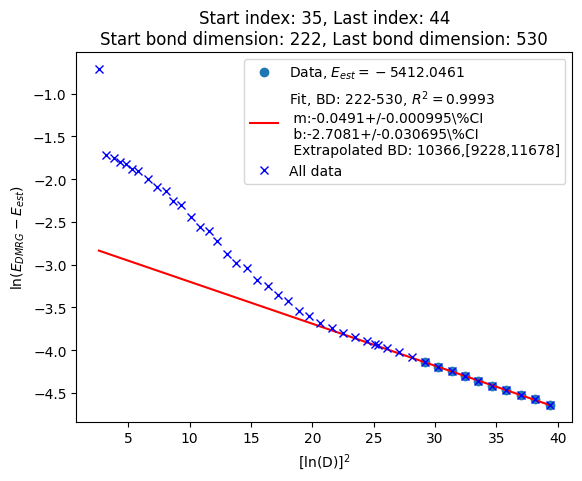

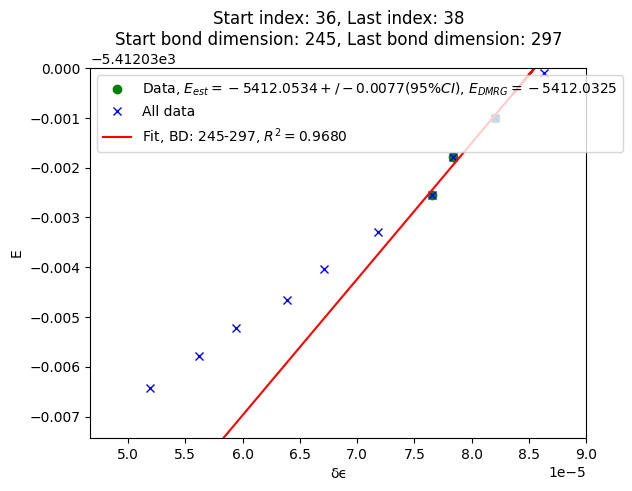

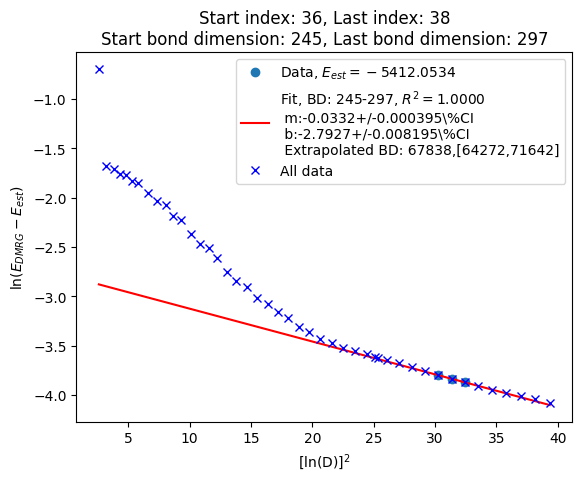

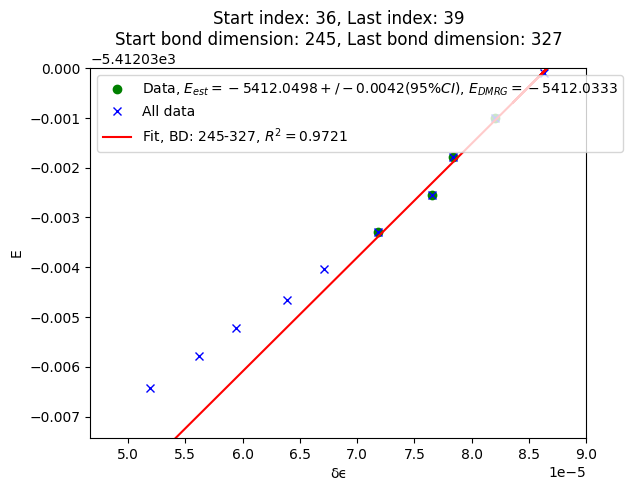

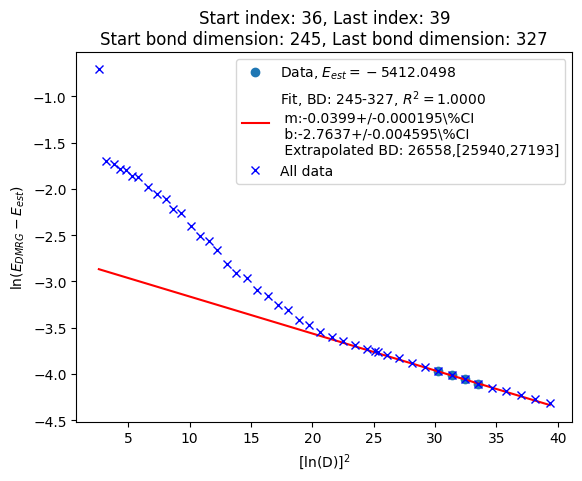

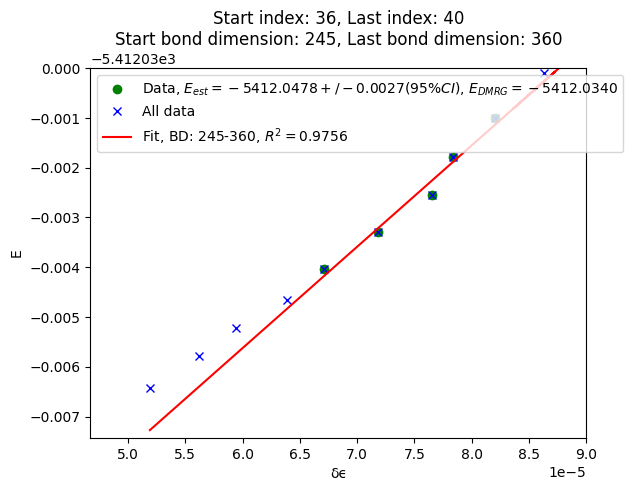

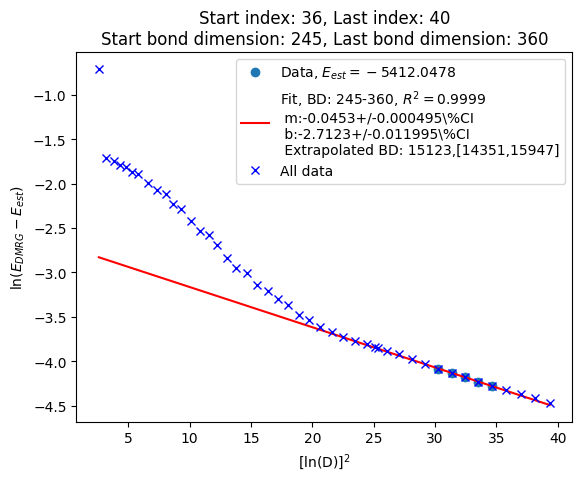

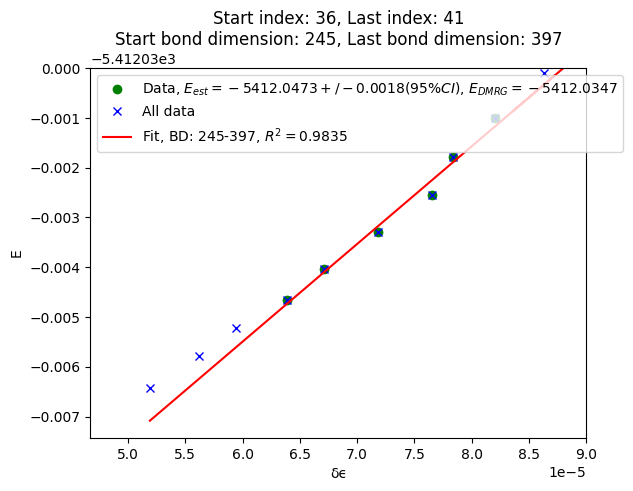

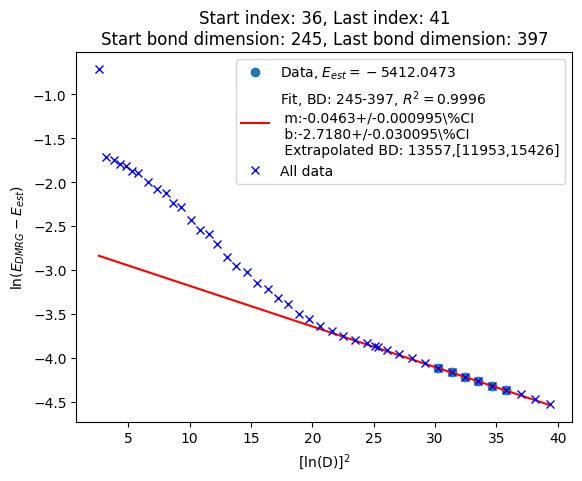

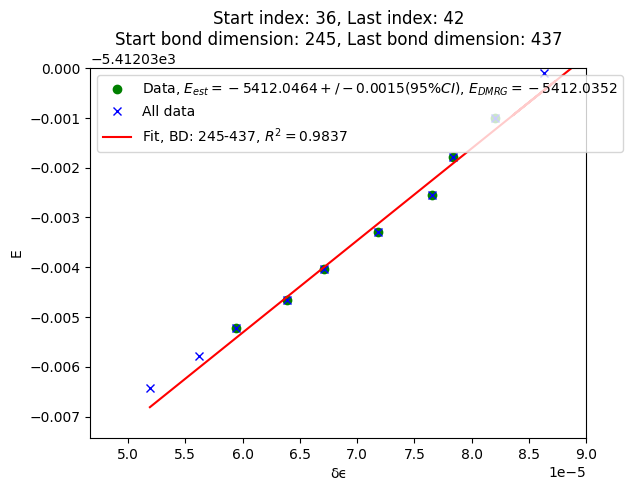

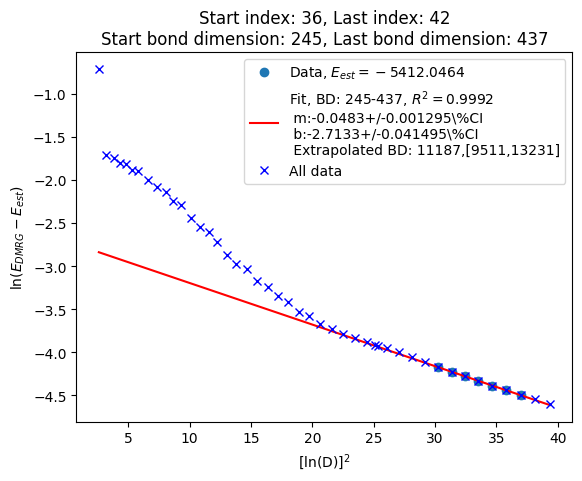

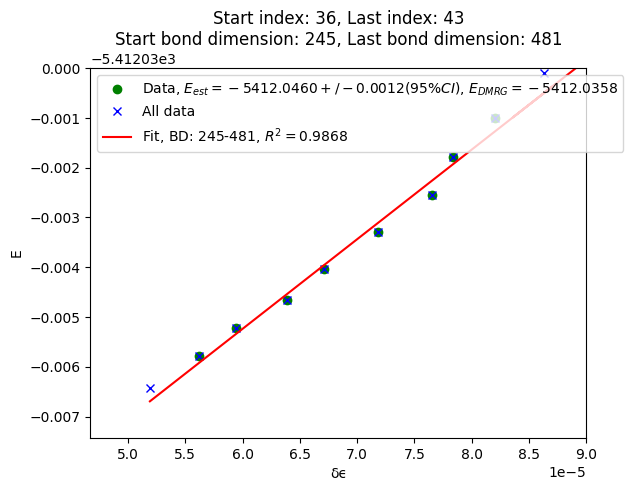

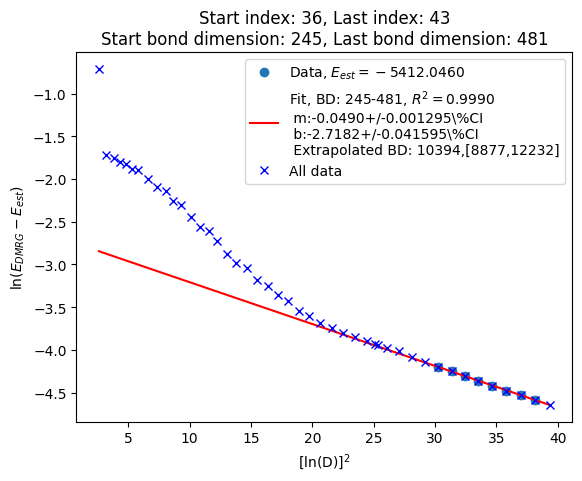

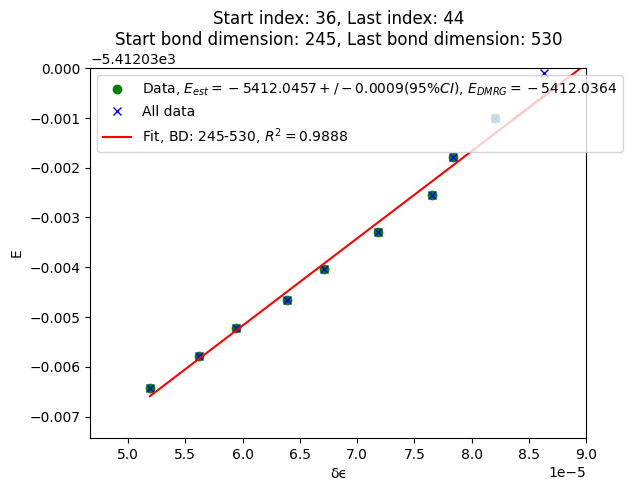

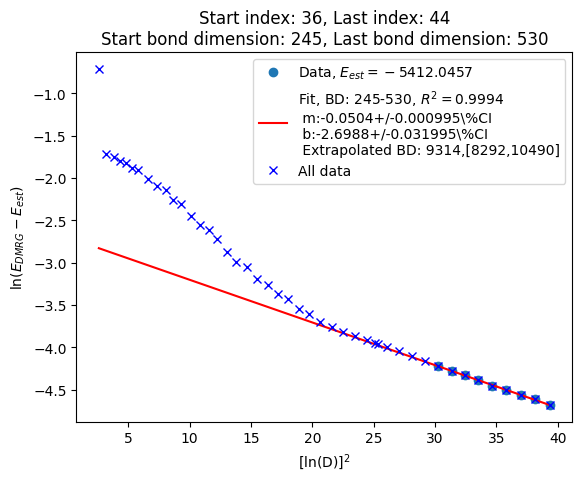

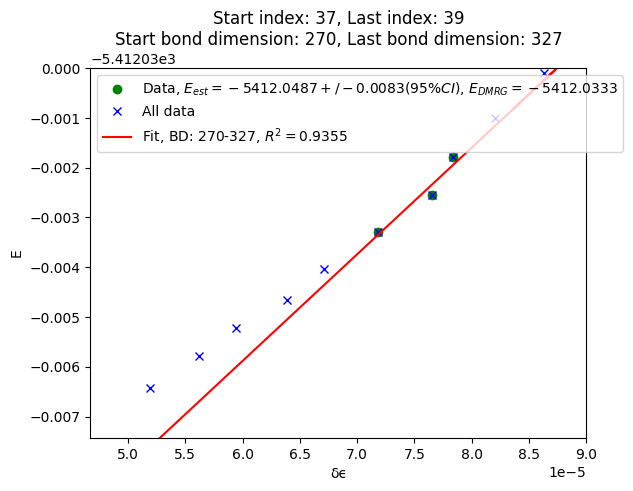

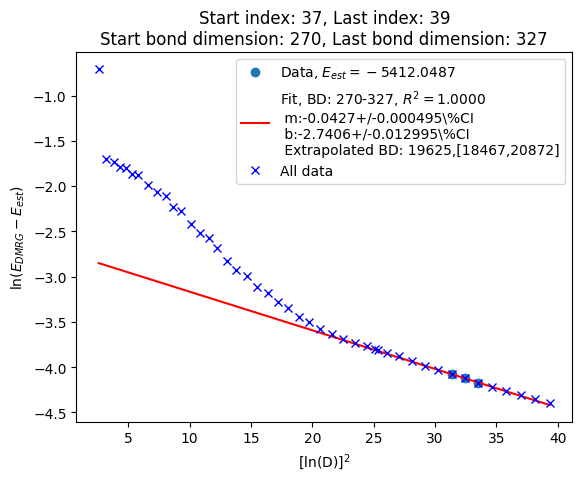

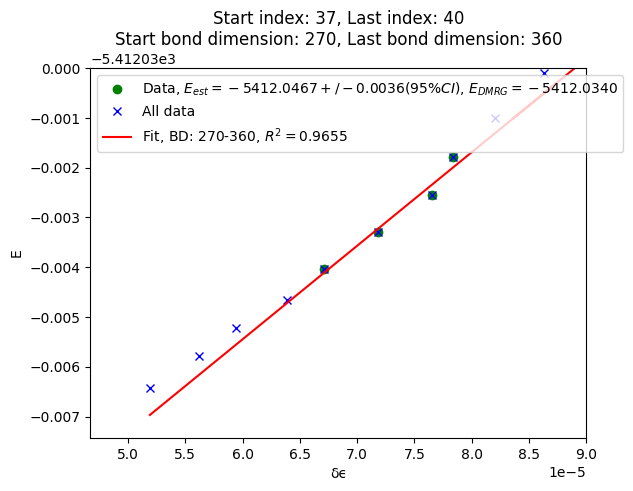

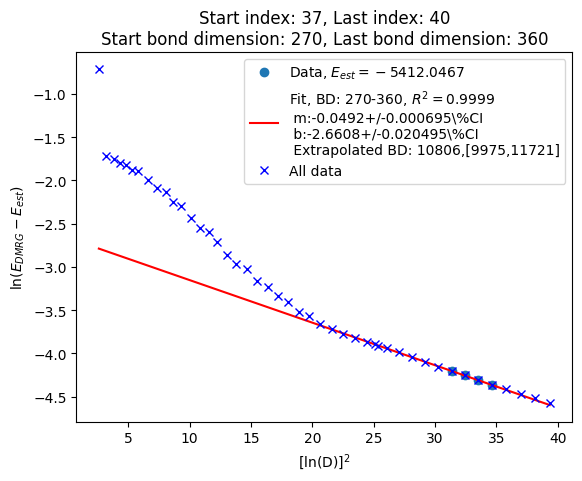

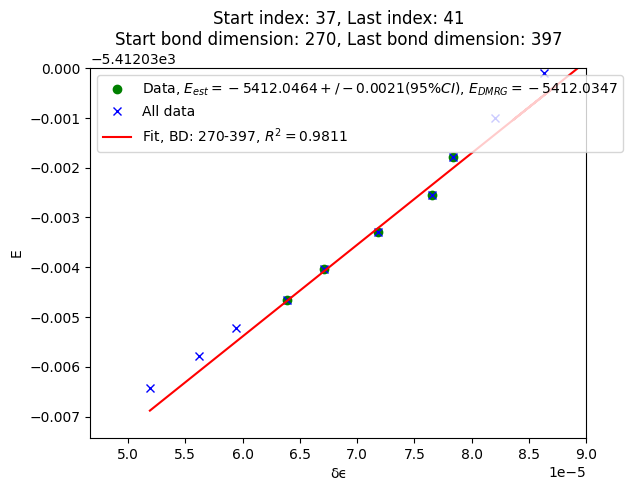

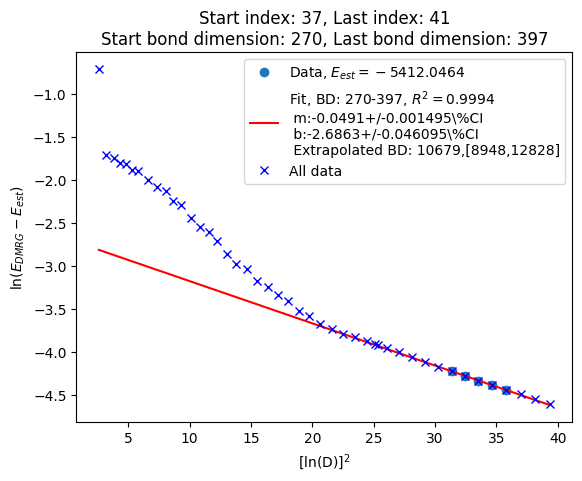

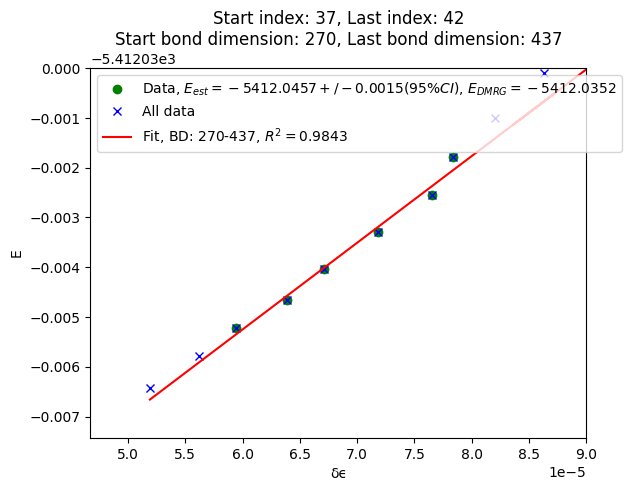

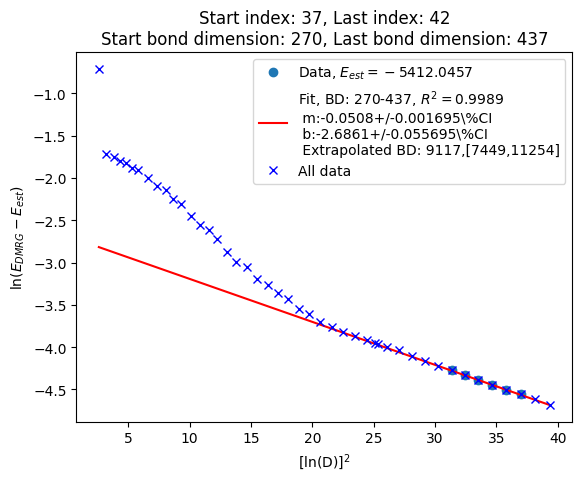

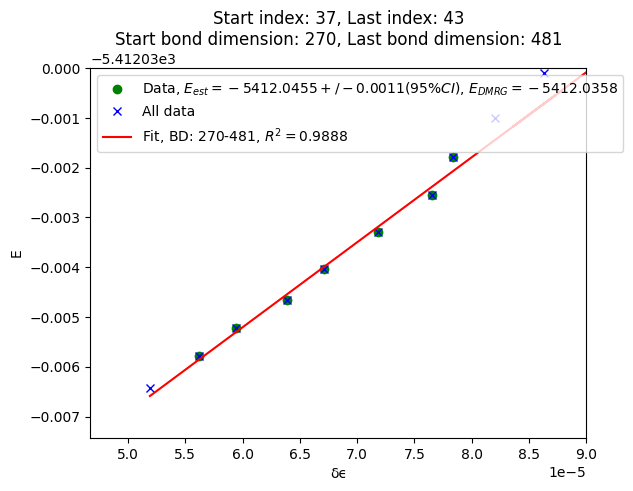

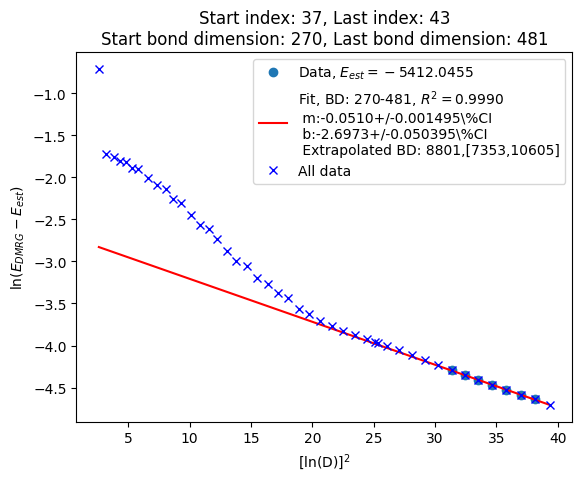

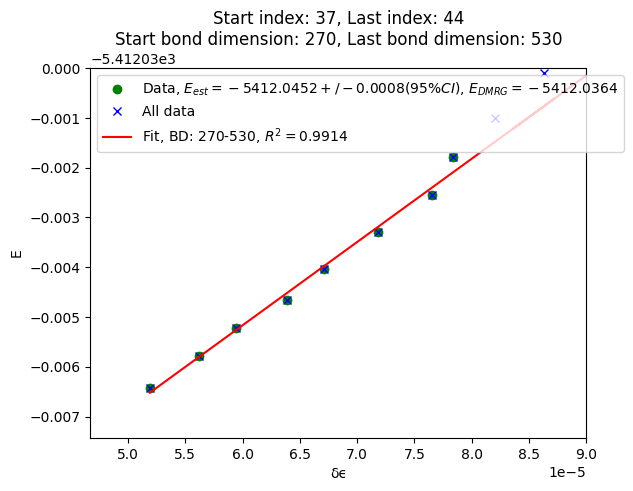

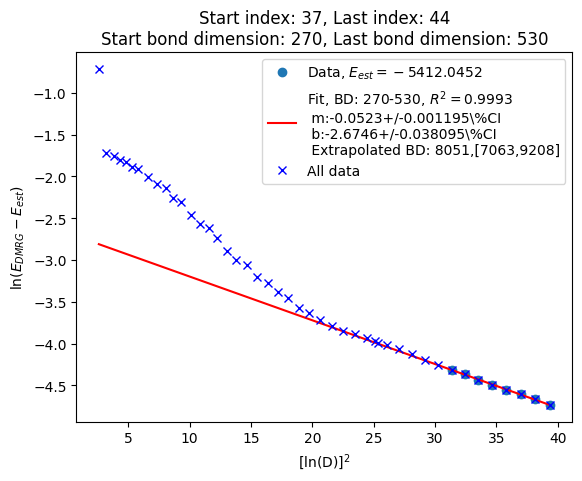

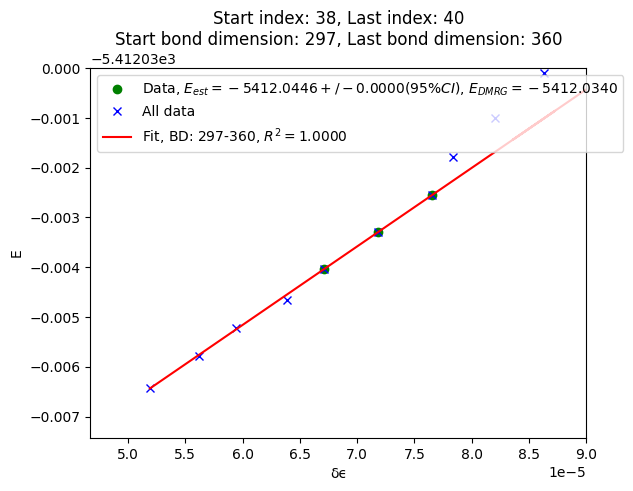

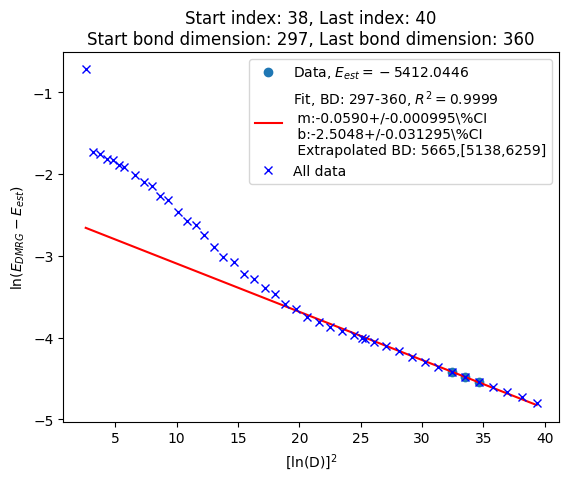

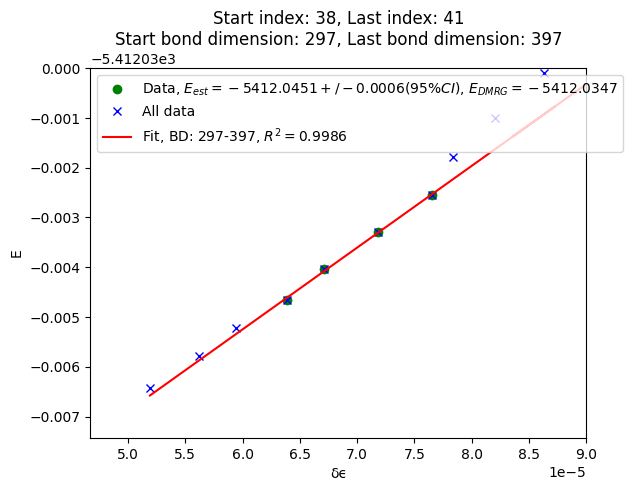

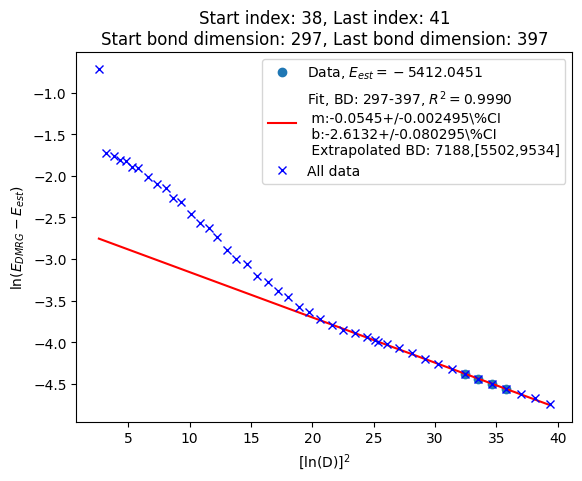

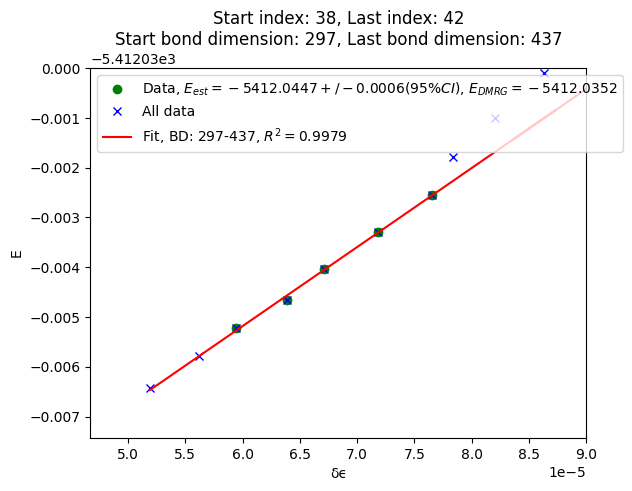

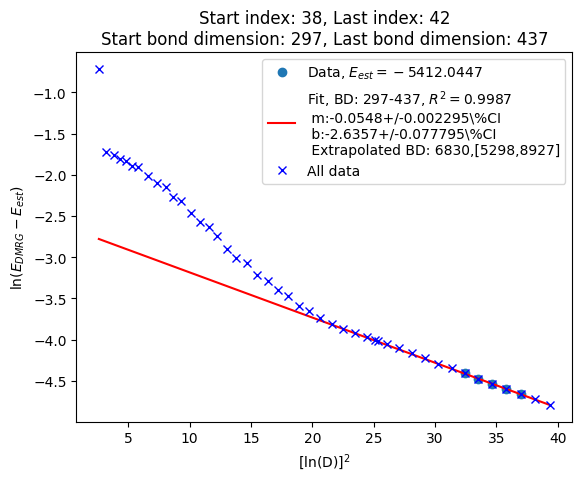

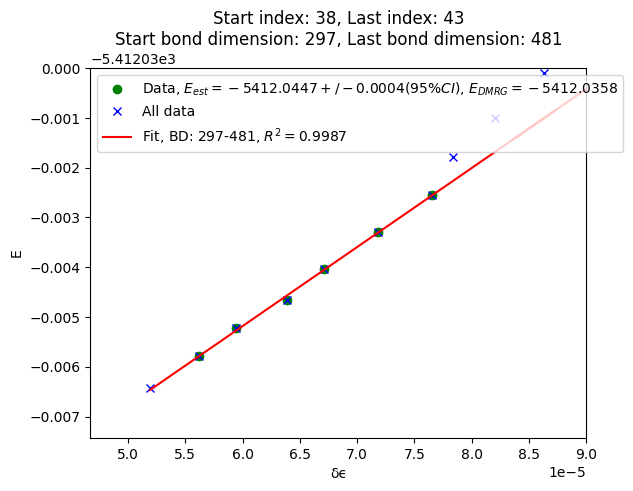

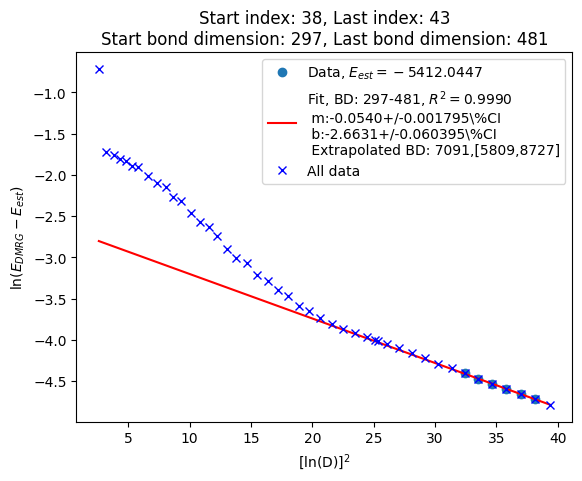

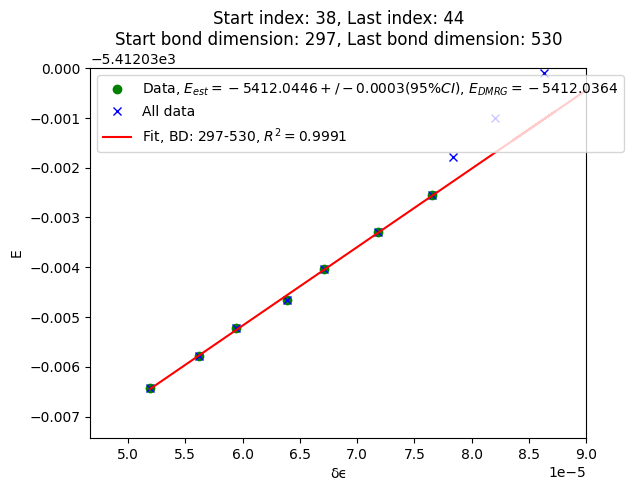

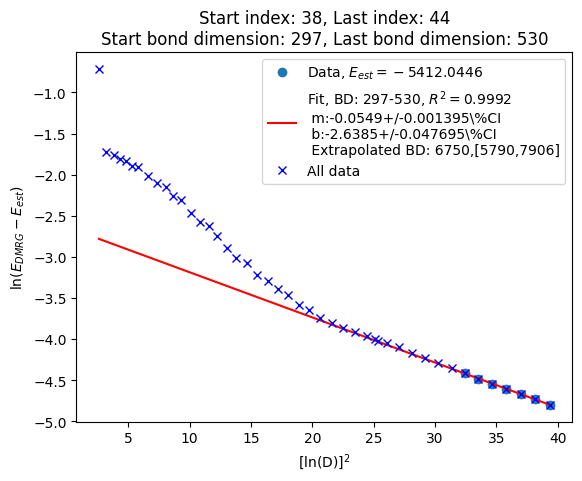

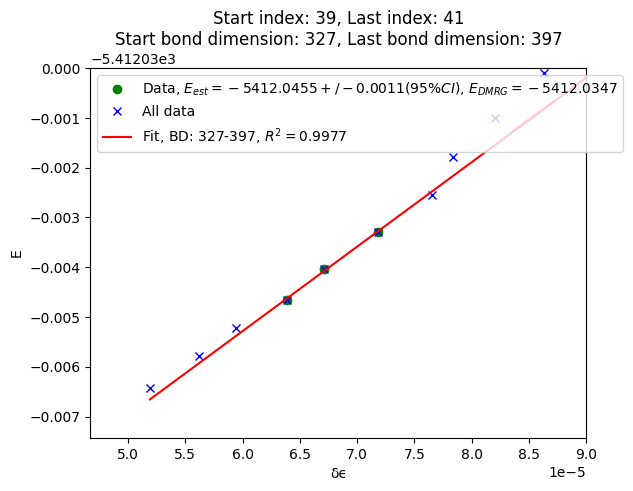

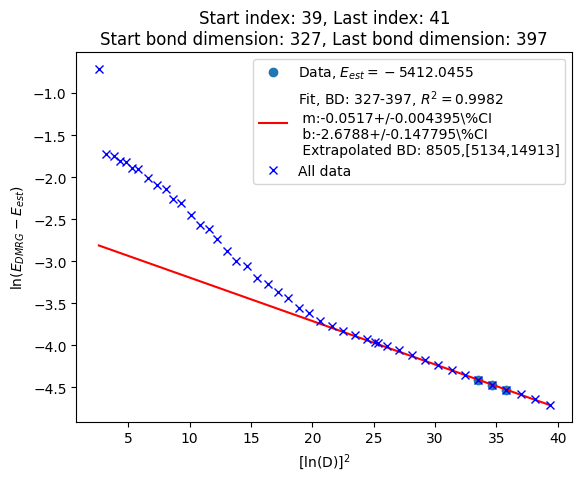

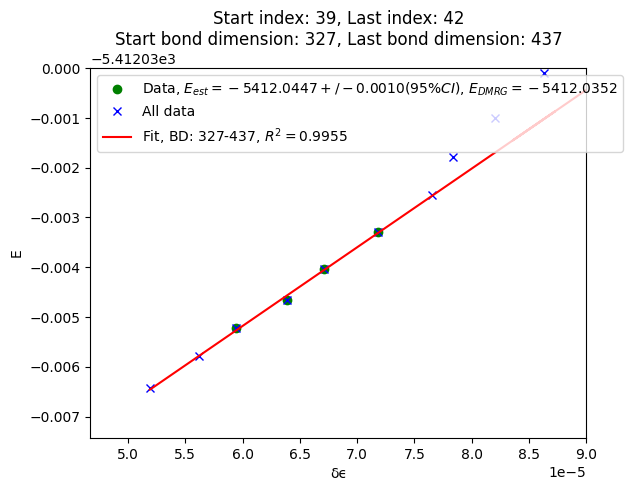

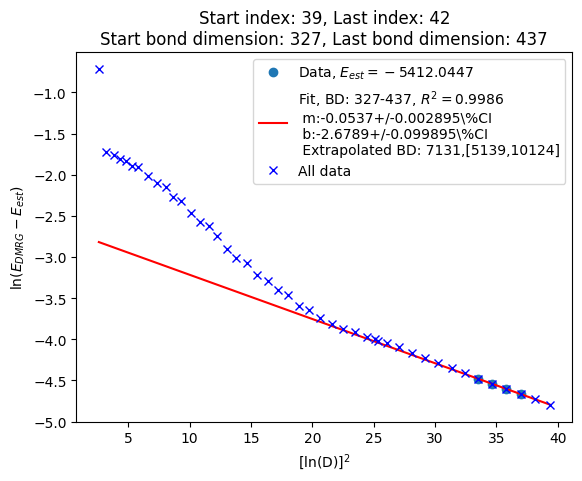

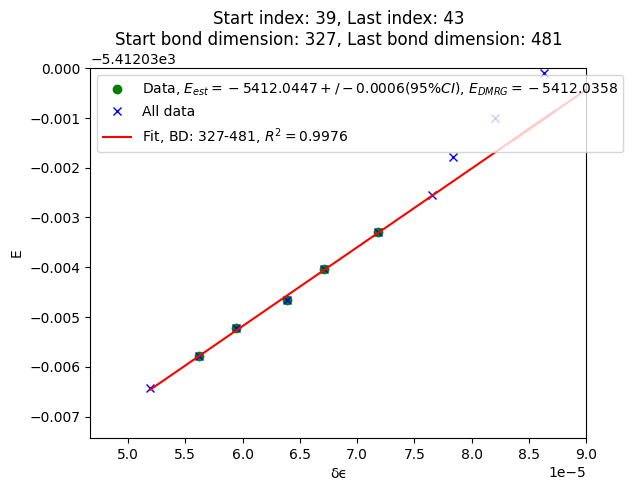

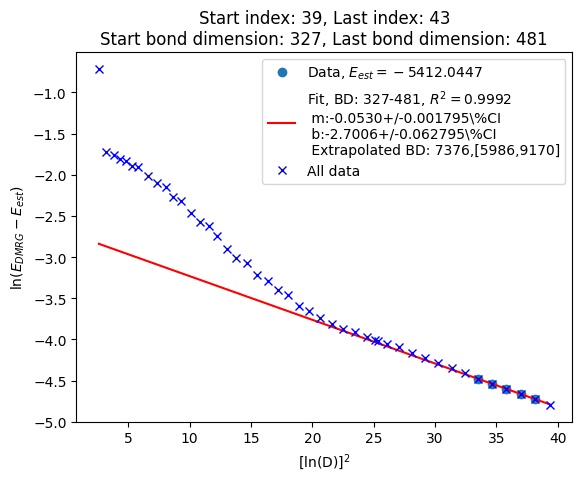

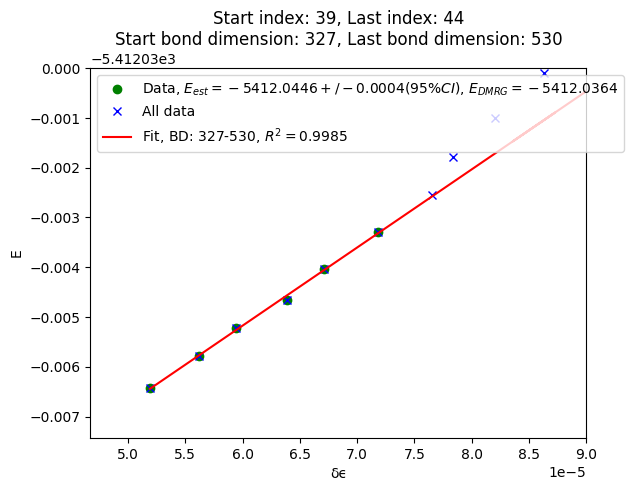

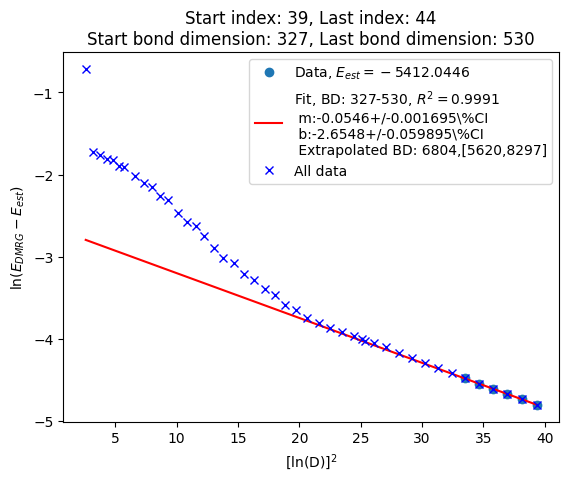

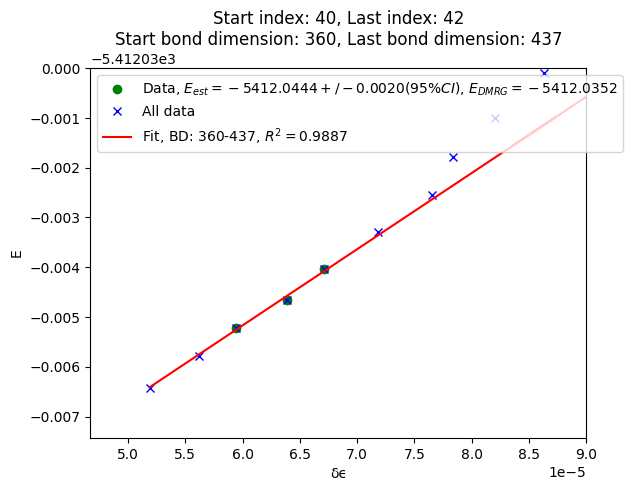

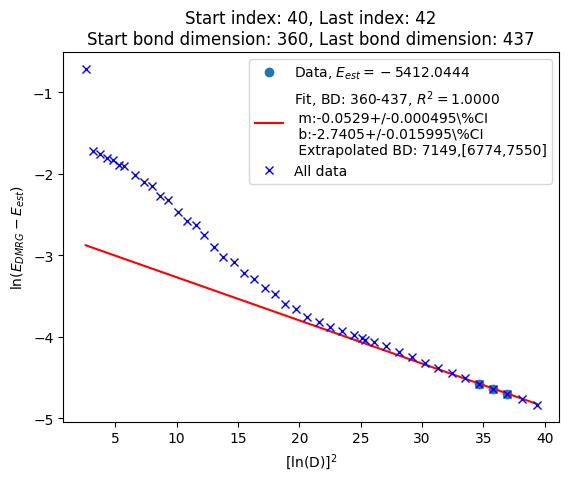

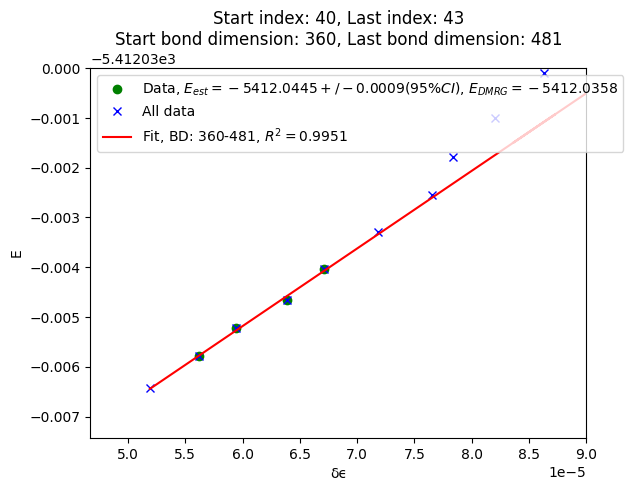

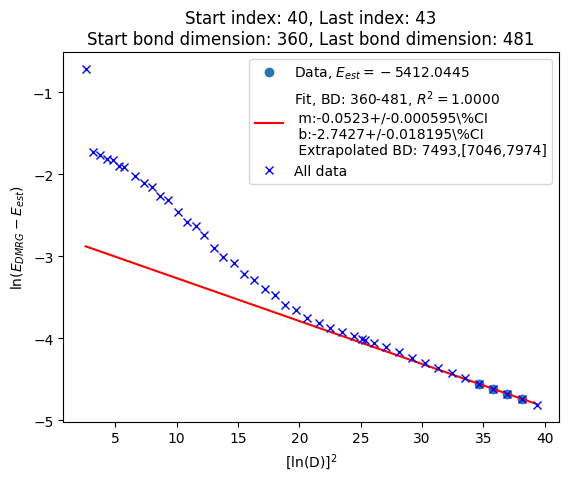

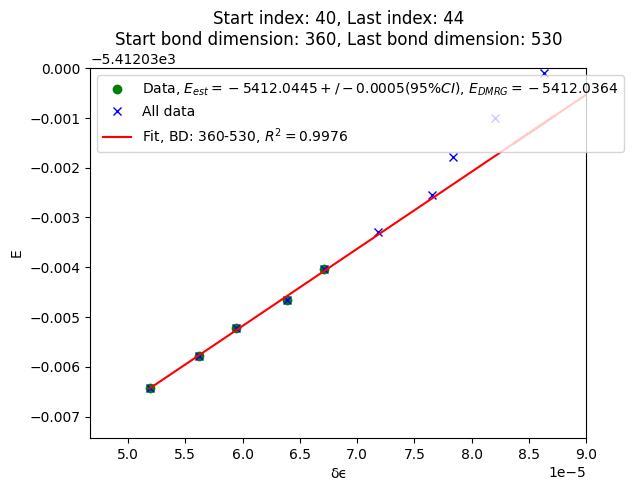

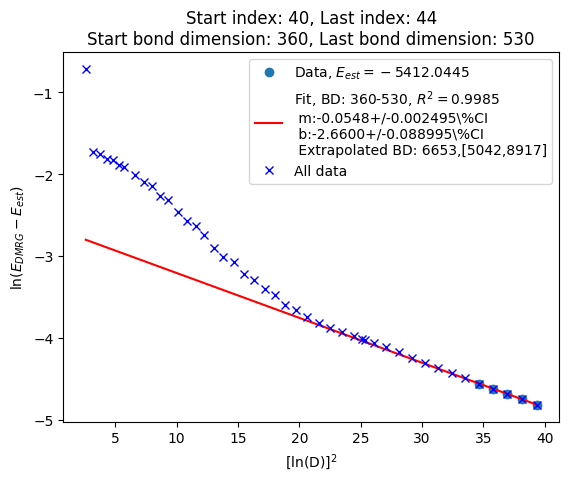

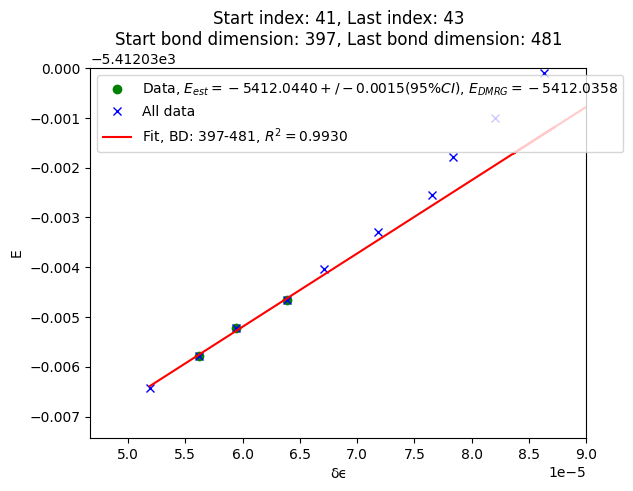

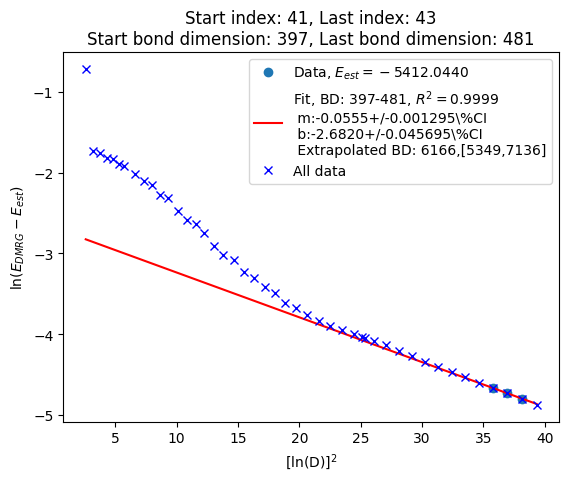

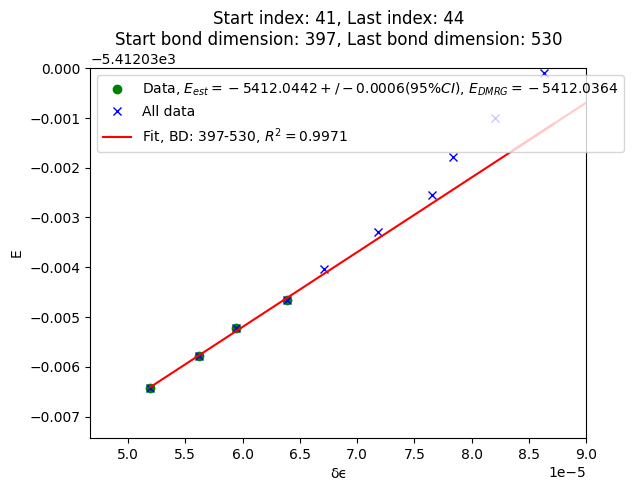

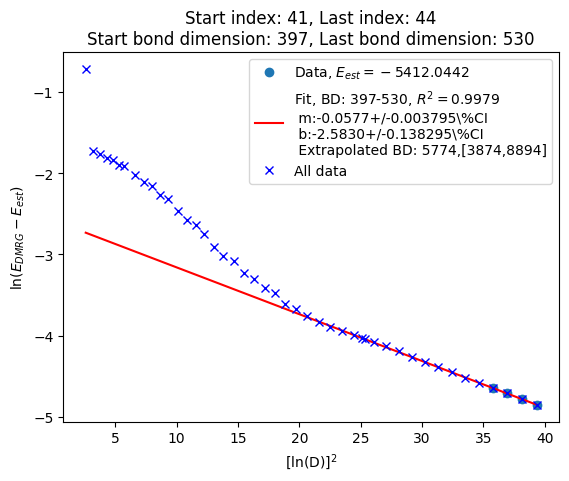

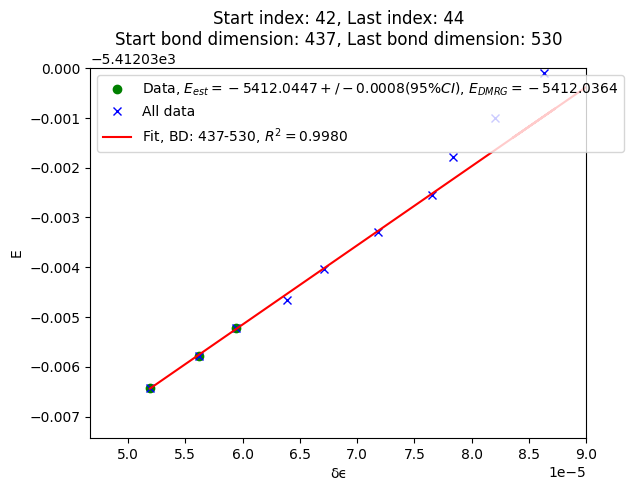

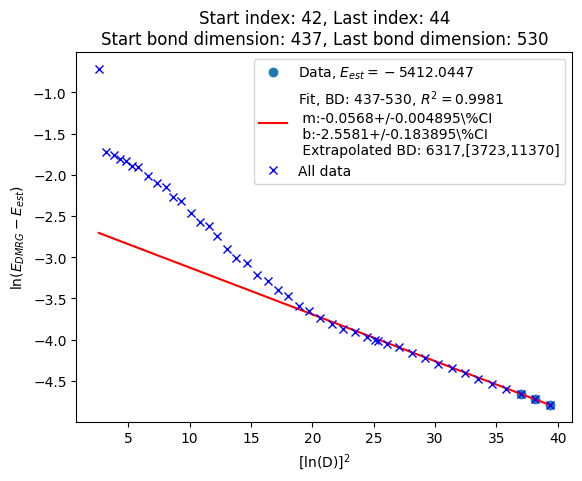

In [56]:
# num_keep = len(sorted_bond_dimensions)
# num_keep = 10


# num_keep_list = [3,4,5,6,7,8,9,10]
# num_keep_list = np.arange(3, len(sorted_bond_dimensions))
# num_keep_list = np.arange(3, 25)
fitting_dict_list = []
# for start_index in range(0, len(sorted_bond_dimensions)):
num_points = len(sorted_bond_dimensions)
for start_index in range(num_points - 10, num_points):
    # for start_index in range(0, 10):
    est_energies_list = []
    r_squared_list = []
    num_keep_list_final = []
    intercept_stderr_list = []
    slope_stderr_list = []
    slope_list = []
    last_index_list = []
    last_bond_dimension_list = []
    best_dmrg_energy_list = []
    bd_intercept_list = []
    bd_slope_list = []
    bd_R_squared_list = []
    bd_intercept_stderr_list = []
    bd_slope_stderr_list = []
    bd_extrapolated_bd_list = []
    bd_max_bd_list = []
    bd_min_bd_list = []
    for last_index in range(start_index + 2, len(sorted_bond_dimensions)):
        kept_bond_dimensions = sorted_bond_dimensions[start_index : last_index + 1]
        kept_dmrg_energies = sorted_dmrg_energies[start_index : last_index + 1]
        kept_discarded_weights = sorted_discarded_weights[start_index : last_index + 1]

        # print("Number of kept bond dimensions:", len(kept_bond_dimensions))
        # print("Kept bond dimensions:", kept_bond_dimensions)
        # print("Kept DMRG energies:", kept_dmrg_energies)
        # print("Kept discarded weights:", kept_discarded_weights)

        # (result_obj, energy_estimated, fit_parameters, R_squared) = ee.dmrg_energy_extrapolation(
        #     energies_dmrg=kept_dmrg_energies,
        #     independent_vars=kept_discarded_weights,
        #     extrapolation_type= "discarded_weight",
        #     past_parameters = None,
        #     verbosity=2,
        # )
        slope, intercept, R_squared, slope_stderr, intercept_stderr = (
            ee.discarded_weight_linear_fitting(
                discarded_weights=kept_discarded_weights,
                dmrg_energies=kept_dmrg_energies,
            )
        )

        energy_estimated = intercept
        # If any DMRG energy is less than the estimated energy, put dummy values
        if np.any(kept_dmrg_energies < energy_estimated):
            bd_slope = np.nan
            bd_intercept = np.nan
            bd_R_squared = np.nan
            bd_slope_stderr = np.nan
            bd_intercept_stderr = np.nan
            extrapolated_bd = np.nan
            max_bd = np.nan
            min_bd = np.nan
        else:
            (
                bd_slope,
                bd_intercept,
                bd_R_squared,
                bd_slope_stderr,
                bd_intercept_stderr,
                extrapolated_bd,
                max_bd,
                min_bd,
            ) = ee.bond_dimension_fitting(
                bond_dims=kept_bond_dimensions,
                dmrg_energies=kept_dmrg_energies,
                exact_energy=energy_estimated,
                extrap_threshold=1e-3,
            )
        # print("Energy estimated:", energy_estimated)
        # print("DMRG Energy:", np.min(kept_dmrg_energies))
        # print("slope:", slope)
        # print("intercept:", intercept)
        # print("R squared:", R_squared)
        # print("1.96*Intercept stderr:", 1.96 * intercept_stderr)
        # print("BD slope:", bd_slope)
        # print("BD intercept:", bd_intercept)
        # print("BD R squared:", bd_R_squared)
        # print("1.96*BD intercept stderr:", 1.96 * bd_intercept_stderr)
        # print("Extrapolated bond dimension:", extrapolated_bd)
        # print("Max bond dimension:", max_bd)
        # print("Min bond dimension:", min_bd)

        est_energies_list.append(energy_estimated)
        r_squared_list.append(R_squared)
        num_keep_list_final.append(num_keep)
        intercept_stderr_list.append(intercept_stderr)
        last_index_list.append(last_index)
        slope_stderr_list.append(slope_stderr)
        slope_list.append(slope)
        last_bond_dimension_list.append(sorted_bond_dimensions[last_index])
        best_dmrg_energy_list.append(np.min(kept_dmrg_energies))
        bd_intercept_list.append(bd_intercept)
        bd_slope_list.append(bd_slope)
        bd_R_squared_list.append(bd_R_squared)
        bd_intercept_stderr_list.append(bd_intercept_stderr)
        bd_slope_stderr_list.append(bd_slope_stderr)
        bd_extrapolated_bd_list.append(extrapolated_bd)
        bd_max_bd_list.append(max_bd)
        bd_min_bd_list.append(min_bd)

        if R_squared < 0.9:
            # print("R squared is less than 0.9. Skipping plotting...")
            continue
        # Plot
        plt.figure()
        # ln_weights = np.log(kept_discarded_weights)
        # rel_energy = (kept_dmrg_energies - energy_estimated)/energy_estimated
        # ln_abs_rel_energy = np.log(np.abs(rel_energy))
        # plt.plot(ln_weights, ln_abs_rel_energy, 'o', label=rf'Data, $E_{{est}}={energy_estimated:.4f}$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$')
        plt.plot(
            kept_discarded_weights,
            kept_dmrg_energies,
            "o",
            label=rf"Data, $E_{{est}}={energy_estimated:.4f}+/-{1.96*intercept_stderr:.4f} (95\% CI)$, $E_{{DMRG}}= {np.min(kept_dmrg_energies):.4f}$",
            color="g",
        )
        # Store x and y lims
        x_lim = plt.xlim()
        y_lim = plt.ylim()
        plt.plot(
            sorted_discarded_weights,
            sorted_dmrg_energies,
            "x",
            label="All data",
            color="b",
        )
        # ln ΔE_rel =a+b ln(δϵ)
        # alpha = fit_parameters[0]
        # a =np.log(alpha)
        # a = fit_parameters[0]
        # b = fit_parameters[1]

        # predicted_rel_energy = a + b * ln_weights
        # # print('alpha:', alpha)
        # print('a:', a)
        # print('b:', b)
        # print('Predicted relative energy:', predicted_rel_energy)
        # plt.plot(ln_weights, predicted_rel_energy, label=f'Fit, num_keep={num_keep}, $R^2={R_squared:.4f}$')
        plt.plot(
            sorted_discarded_weights,
            slope * sorted_discarded_weights + intercept,
            label=f"Fit, BD: {int(sorted_bond_dimensions[start_index]):d}-{int(sorted_bond_dimensions[last_index]):d}, $R^2={R_squared:.4f}$",
            color="r",
        )
        # plt.xlim([np.min(sorted_discarded_weights)*0.9, np.max(kept_discarded_weights)*1.1])
        # plt.ylim([np.min(sorted_dmrg_energies)*1.001, np.max(sorted_dmrg_energies)*0.99999])
        # plt.xlim(np.min(sorted_discarded_weights)*0.9,x_lim[1])

        # plt.ylim(np.min(sorted_dmrg_energies)-0.001,y_lim[1])
        plt.xlim(np.min(sorted_discarded_weights) * 0.9, 0.9e-4)
        plt.ylim(np.min(sorted_dmrg_energies) - 0.001, -5412.03)

        # ee.plot_extrapolation(discarded_weights=kept_discarded_weights,
        #     energies_dmrg=kept_dmrg_energies,
        #     fit_parameters=fit_parameters,
        #     bond_dims=kept_bond_dimensions,
        #     plot_filename = None,
        #     figNum = 0,
        # )
        plt.title(
            f"Start index: {start_index}, Last index: {last_index}\nStart bond dimension: {int(sorted_bond_dimensions[start_index]):d}, Last bond dimension: {int(sorted_bond_dimensions[last_index]):d}"
        )
        plt.xlabel("δϵ")
        plt.ylabel("E")
        plt.legend(loc="upper left")

        # Plot BD fitting
        plt.figure()
        ln_bd_squared_kept = np.log(kept_bond_dimensions) ** 2
        deviation_energy_kept = kept_dmrg_energies - energy_estimated
        ln_deviation_energy_kept = np.log(deviation_energy_kept)
        plt.plot(
            ln_bd_squared_kept,
            ln_deviation_energy_kept,
            "o",
            label=rf"Data, $E_{{est}}={energy_estimated:.4f}$",
        )

        ln_bd_squared_sorted = np.log(sorted_bond_dimensions) ** 2
        deviation_energy_sorted = sorted_dmrg_energies - energy_estimated
        ln_deviation_energy_sorted = np.log(deviation_energy_sorted)
        plt.plot(
            ln_bd_squared_sorted,
            bd_slope * ln_bd_squared_sorted + bd_intercept,
            label=(
                rf"Fit, BD: {int(sorted_bond_dimensions[start_index]):d}-{int(sorted_bond_dimensions[last_index]):d}, $R^2={bd_R_squared:.4f}$"
                f"\n m:{bd_slope:.4f}+/-{1.96*bd_slope_stderr:.4f}95\%CI\n b:{bd_intercept:.4f}+/-{1.96*bd_intercept_stderr:.4f}95\%CI\n Extrapolated BD: {int(extrapolated_bd):d},[{int(min_bd):d},{int(max_bd):d}]"
            ),
            color="r",
        )
        plt.plot(
            ln_bd_squared_sorted,
            ln_deviation_energy_sorted,
            "x",
            label="All data",
            color="b",
        )

        plt.title(
            f"Start index: {start_index}, Last index: {last_index}\nStart bond dimension: {int(sorted_bond_dimensions[start_index]):d}, Last bond dimension: {int(sorted_bond_dimensions[last_index]):d}"
        )
        plt.xlabel(r"$[\ln(\text{D})]^2$")
        plt.ylabel(r"$\ln(E_{DMRG}-E_{est})$")
        plt.legend(loc="upper right")

    fitting_dict_list.append(
        {
            "start_index": start_index,
            "start_bond_dimension": sorted_bond_dimensions[start_index],
            "last_bond_dimension_list": last_bond_dimension_list,
            "last_index_list": last_index_list,
            "num_keep_list_final": num_keep_list_final,
            "est_energies_list": est_energies_list,
            "r_squared_list": r_squared_list,
            "intercept_stderr_list": intercept_stderr_list,
            "slope_list": slope_list,
            "slope_stderr_list": slope_stderr_list,
            "best_dmrg_energy_list": best_dmrg_energy_list,
            "bd_intercept_list": bd_intercept_list,
            "bd_slope_list": bd_slope_list,
            "bd_R_squared_list": bd_R_squared_list,
            "bd_intercept_stderr_list": bd_intercept_stderr_list,
            "bd_slope_stderr_list": bd_slope_stderr_list,
            "bd_extrapolated_bd_list": bd_extrapolated_bd_list,
            "bd_max_bd_list": bd_max_bd_list,
            "bd_min_bd_list": bd_min_bd_list,
        }
    )
plt.show()

[16296.039077237536, 32049.43255448129, 24199.001953955045, 16795.008478398744, 15053.409776135755, 12615.089719050131, 11604.936463433762, 10366.836531156623]
[[12707.79977493 26610.67436924 21668.05964204 15768.15978964
  13426.00360819 10874.88058831  9972.77172667  9228.42506059]
 [21184.26178809 38882.91199766 27094.45614602 17903.49143802
  16924.22238001 14701.40907904 13568.95320306 11678.08336333]]
[67838.11659581974, 26558.540766462884, 15123.922071417968, 13557.131673196387, 11187.890813360507, 10394.365240801728, 9314.408121630378]
[[64272.64981624 25940.98996005 14351.12051271 11953.91188954
   9511.91417713  8877.93492126  8292.62144628]
 [71642.94259728 27193.85015671 15947.37456662 15426.15232163
  13231.77738196 12232.71866471 10490.97414929]]
[19625.41577211264, 10806.290923587514, 10679.062036260833, 9117.320745146806, 8801.698166569822, 8051.090427510222]
[[18467.02256284  9975.90078539  8948.3704114   7449.67462014
   7353.97658561  7063.45889819]
 [20872.31643202 

/tmp/ipykernel_22420/438624633.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


[7149.654375273749, 7493.614765655719, 6653.132976309772]
[[6774.45574879 7046.67223407 5042.27343349]
 [7550.00323958 7974.87166928 8917.98038063]]
[6166.145942500251, 5774.210871515893]
[[5349.24095345 3874.66933334]
 [7136.49410776 8894.93751064]]
[6317.164616669328]
[[ 3723.94858762]
 [11370.75915337]]
[]
[]
[]
[]


<Figure size 640x480 with 0 Axes>

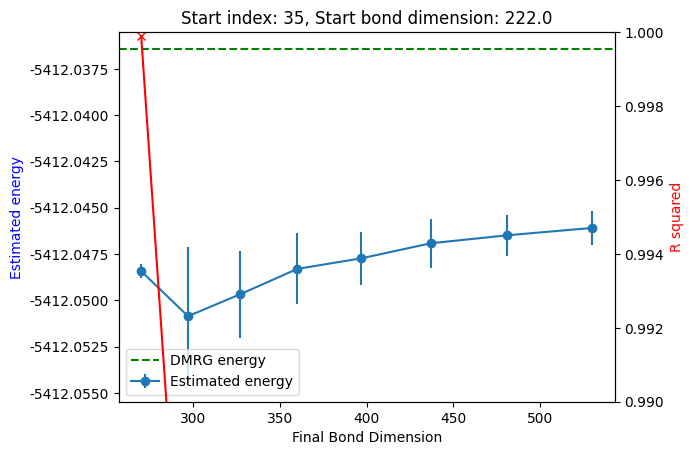

<Figure size 640x480 with 0 Axes>

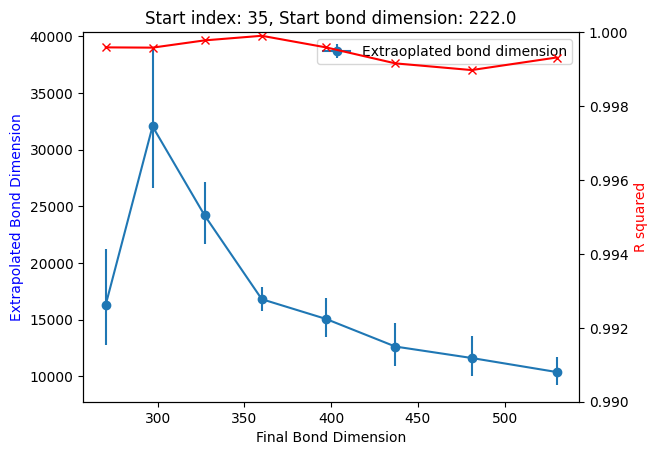

<Figure size 640x480 with 0 Axes>

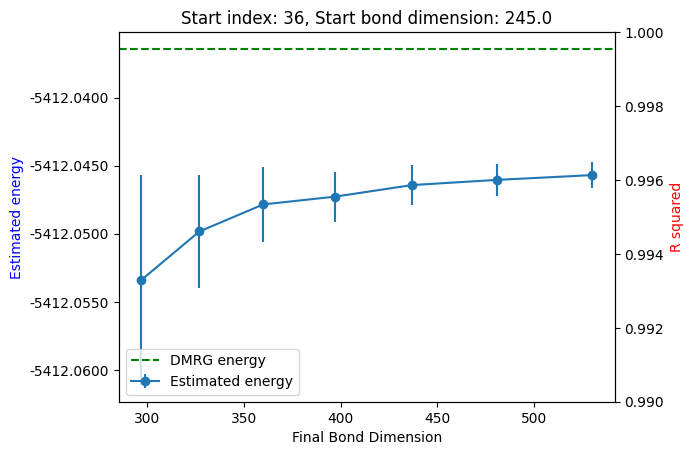

<Figure size 640x480 with 0 Axes>

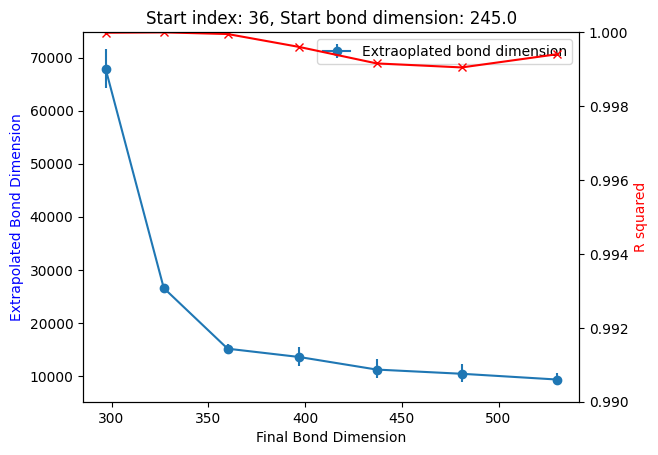

<Figure size 640x480 with 0 Axes>

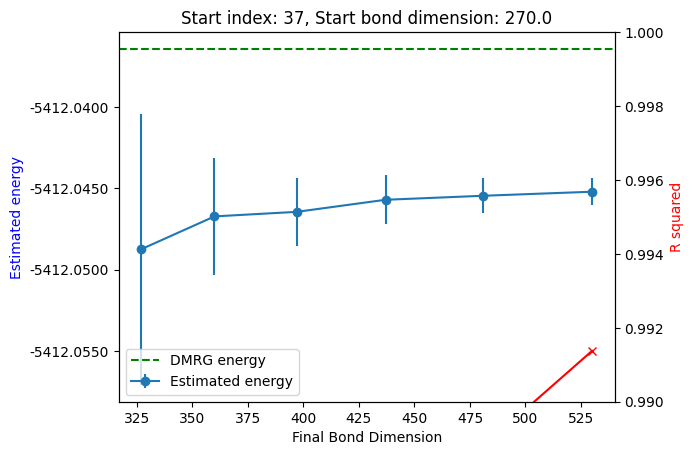

<Figure size 640x480 with 0 Axes>

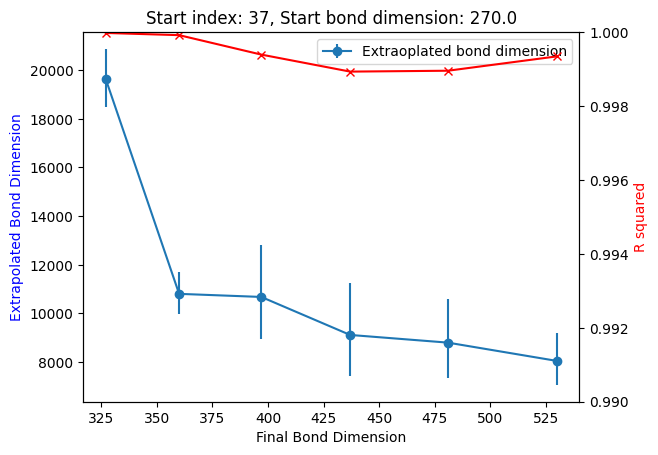

<Figure size 640x480 with 0 Axes>

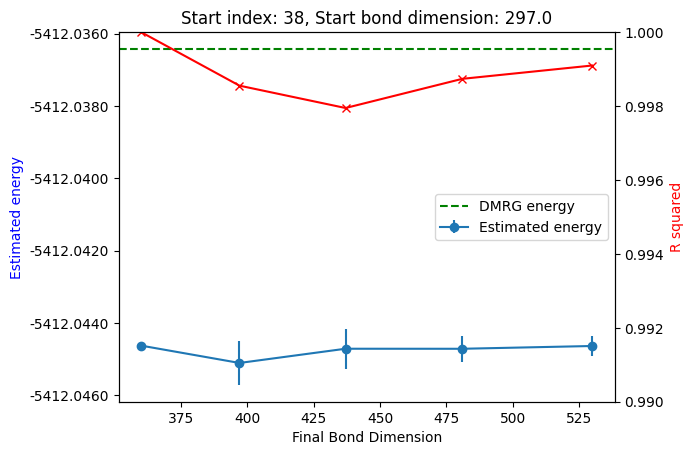

<Figure size 640x480 with 0 Axes>

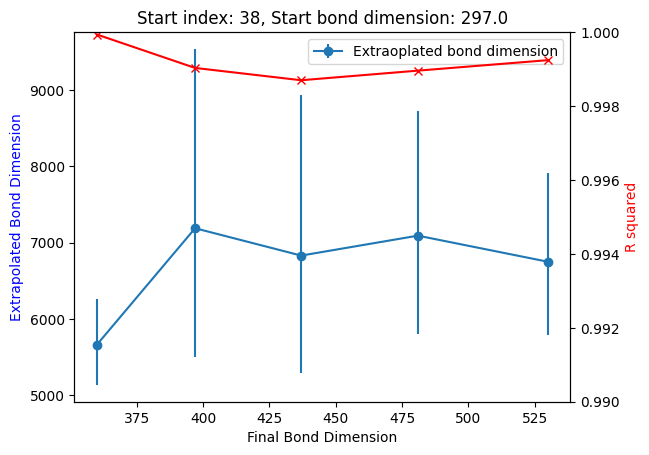

<Figure size 640x480 with 0 Axes>

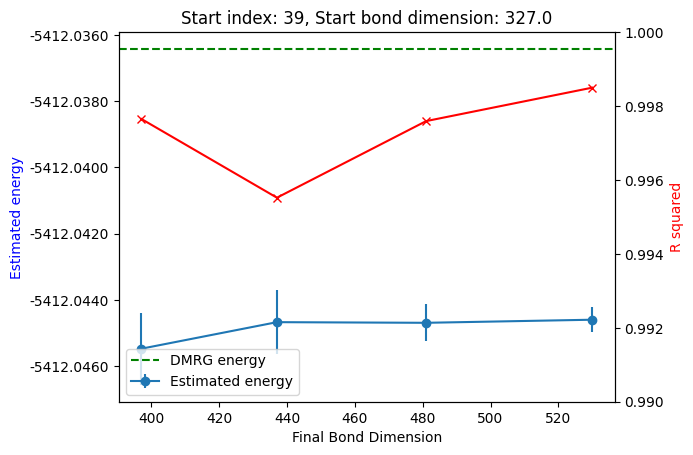

<Figure size 640x480 with 0 Axes>

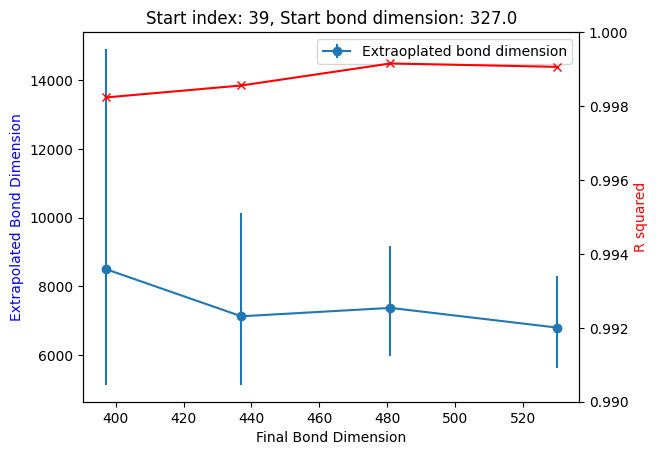

<Figure size 640x480 with 0 Axes>

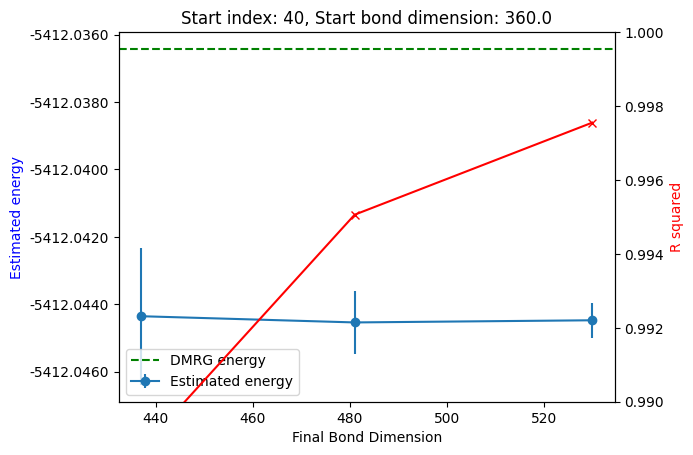

<Figure size 640x480 with 0 Axes>

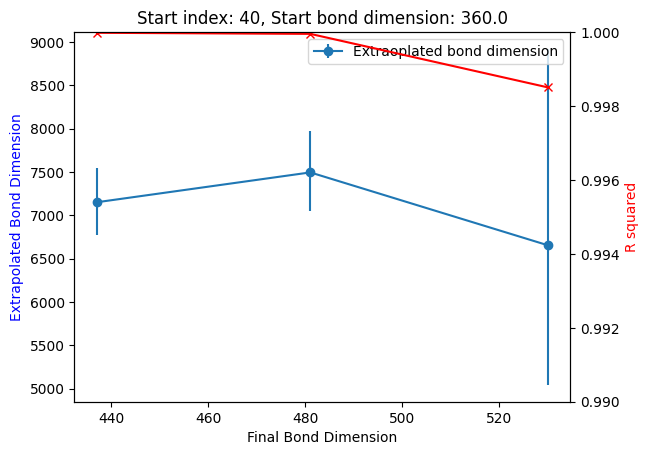

<Figure size 640x480 with 0 Axes>

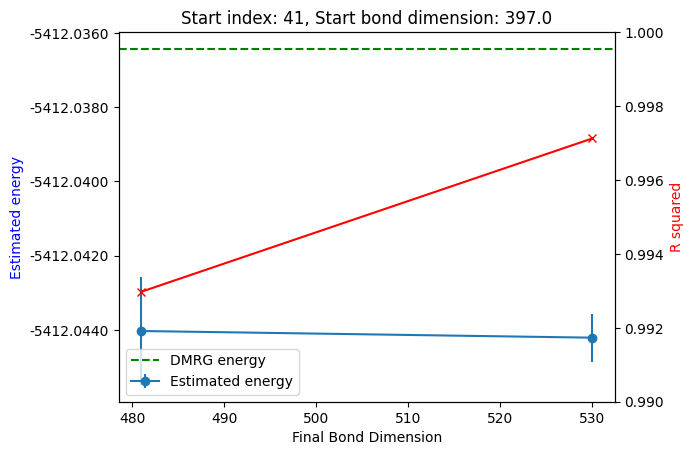

<Figure size 640x480 with 0 Axes>

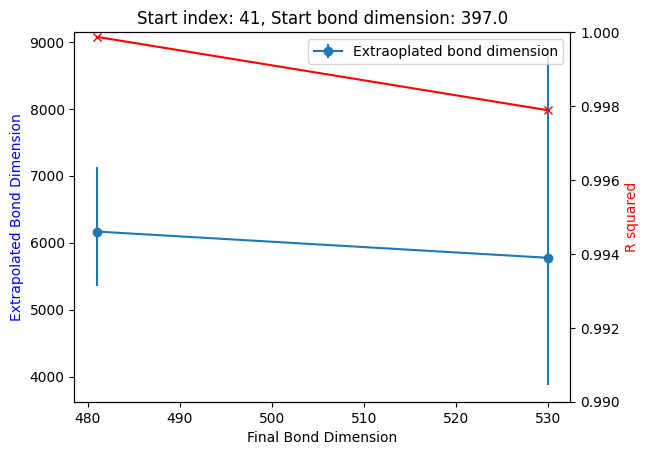

<Figure size 640x480 with 0 Axes>

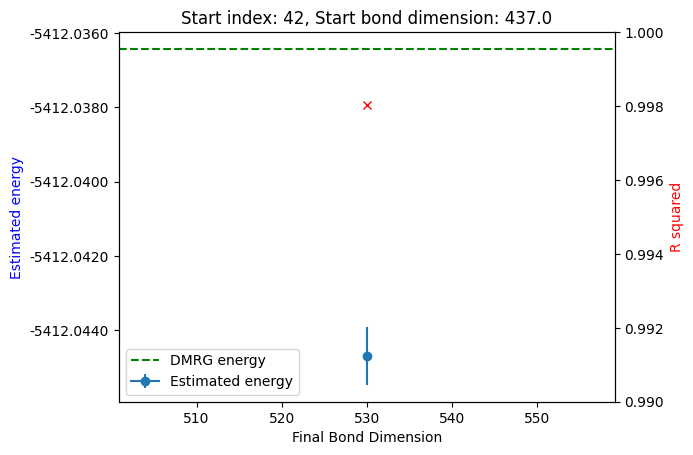

<Figure size 640x480 with 0 Axes>

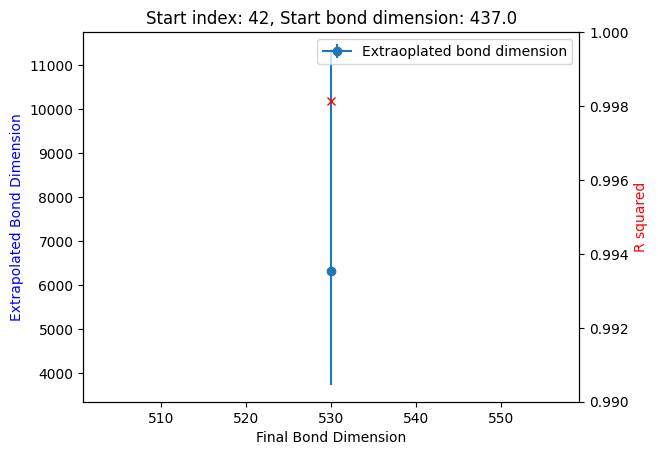

<Figure size 640x480 with 0 Axes>

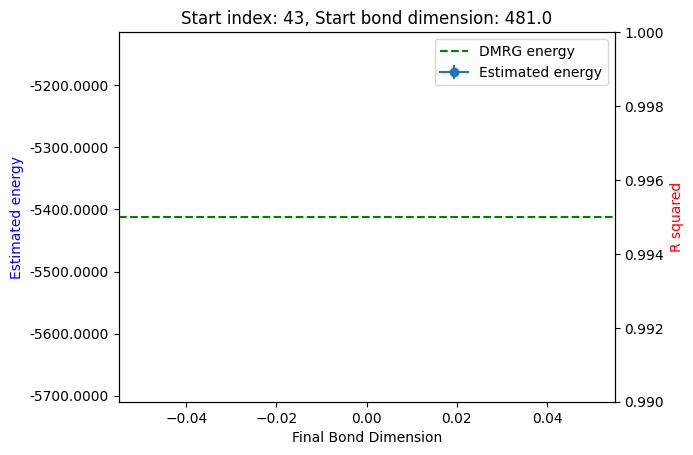

<Figure size 640x480 with 0 Axes>

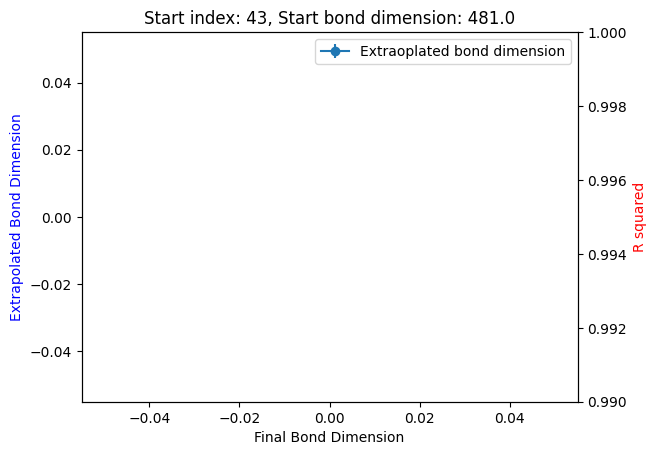

<Figure size 640x480 with 0 Axes>

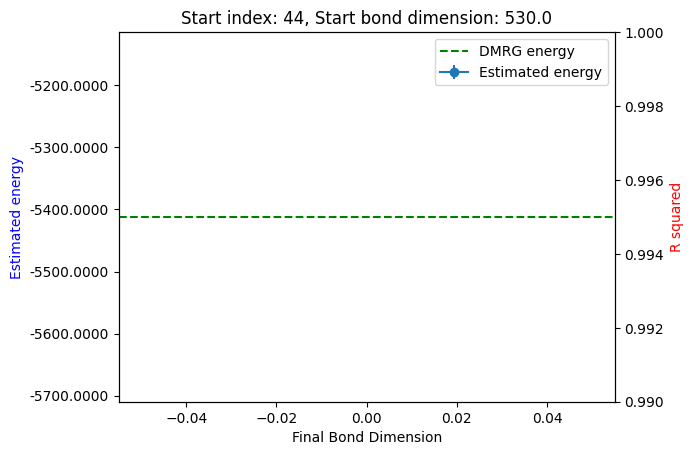

<Figure size 640x480 with 0 Axes>

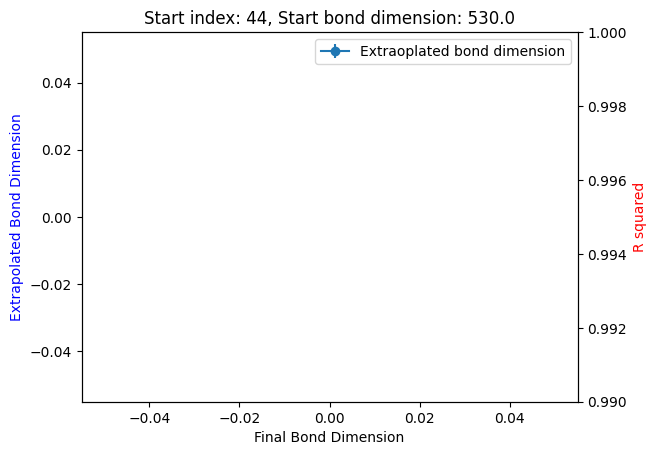

In [61]:
for extrap_data_dict in fitting_dict_list:
    start_index = extrap_data_dict["start_index"]
    start_bond_dimension = extrap_data_dict["start_bond_dimension"]
    last_bond_dimension_list = extrap_data_dict["last_bond_dimension_list"]
    last_index_list = extrap_data_dict["last_index_list"]
    num_keep_list_final = extrap_data_dict["num_keep_list_final"]
    est_energies_list = extrap_data_dict["est_energies_list"]
    r_squared_list = extrap_data_dict["r_squared_list"]
    intercept_stderr_list = extrap_data_dict["intercept_stderr_list"]
    slope_list = extrap_data_dict["slope_list"]
    slope_stderr_list = extrap_data_dict["slope_stderr_list"]
    best_dmrg_energy_list = extrap_data_dict["best_dmrg_energy_list"]
    bd_intercept_list = extrap_data_dict["bd_intercept_list"]
    bd_slope_list = extrap_data_dict["bd_slope_list"]
    bd_R_squared_list = extrap_data_dict["bd_R_squared_list"]
    bd_intercept_stderr_list = extrap_data_dict["bd_intercept_stderr_list"]
    bd_slope_stderr_list = extrap_data_dict["bd_slope_stderr_list"]
    bd_extrapolated_bd_list = extrap_data_dict["bd_extrapolated_bd_list"]
    bd_max_bd_list = extrap_data_dict["bd_max_bd_list"]
    bd_min_bd_list = extrap_data_dict["bd_min_bd_list"]
    # Plot est energies and r squared on same plot with num keep as x axis and two different y axes
    plt.figure()
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.errorbar(last_bond_dimension_list, est_energies_list, yerr=1.96*np.array(intercept_stderr_list), marker='o', linestyle='-', label='Estimated energy')
    ax2.plot(last_bond_dimension_list, r_squared_list, 'x-', label='R squared', color='r')
    ax1.set_xlabel('Final Bond Dimension')
    ax1.set_ylabel('Estimated energy', color='b')
    ax2.set_ylabel('R squared', color='r')
    ax2.set_ylim([0.99,1])
    # ax1.text(0.9, 0.9, f'95% CI: +/-{1.96*intercept_stderr*1000:.3f} mHa', horizontalalignment='right', verticalalignment='center', transform=ax1.transAxes)
    # Format ax1 to have four decimal places in labels with no shift value
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))
    # Add DMRG energy
    ax1.axhline(y=np.min(dmrg_energies), color='g', linestyle='--', label='DMRG energy')
    plt.title(
        f"Start index: {start_index}, Start bond dimension: {start_bond_dimension}"
    )
    # Add legend
    ax1.legend()

    # Plot BD extrapolation
    plt.figure()
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    upper_error = np.array(bd_max_bd_list) - np.array(bd_extrapolated_bd_list)
    lower_error = np.array(bd_extrapolated_bd_list) - np.array(bd_min_bd_list)
    ax1.errorbar(last_bond_dimension_list, bd_extrapolated_bd_list, yerr=np.vstack([lower_error,upper_error]), marker='o', linestyle='-', label='Extraoplated bond dimension')
    ax2.plot(last_bond_dimension_list, bd_R_squared_list, 'x-', label='R squared', color='r')
    ax1.set_xlabel('Final Bond Dimension')
    ax1.set_ylabel('Extrapolated Bond Dimension', color='b')
    ax2.set_ylabel('R squared', color='r')
    ax2.set_ylim([0.99,1])
    # ax1.text(0.9, 0.9, f'95% CI: +/-{1.96*intercept_stderr*1000:.3f} mHa', horizontalalignment='right', verticalalignment='center', transform=ax1.transAxes)
    # Format ax1 to have four decimal places in labels with no shift value
    # ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.4f}'.format(x)))
    # Add DMRG energy
    # ax1.axhline(y=np.min(dmrg_energies), color='g', linestyle='--', label='DMRG energy')
    plt.title(
        f"Start index: {start_index}, Start bond dimension: {start_bond_dimension}"
    )
    # Add legend
    ax1.legend()
    print(bd_extrapolated_bd_list)
    print(np.vstack([bd_min_bd_list,bd_max_bd_list]))

(-5412.04, -5412.02)

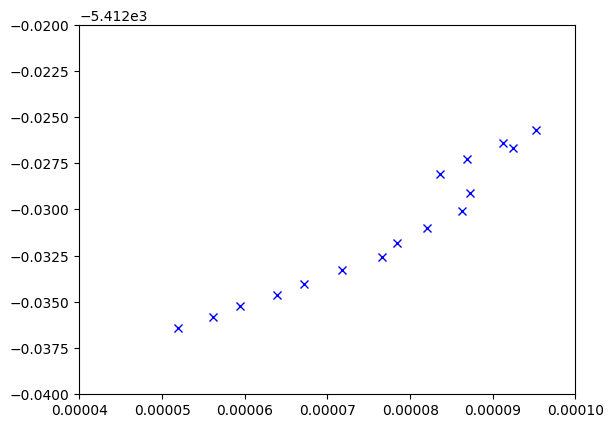

In [24]:
plt.plot(
            sorted_discarded_weights,
            sorted_dmrg_energies,
            "x",
            label="All data",
            color="b",
        )
plt.xlim(4e-5, 1e-4)
plt.ylim(-5412.04, -5412.02)